# Apprentissage des autoencodeurs

## Autoencoder
https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import sys,os
from importlib import reload

import random

### Define models

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [ ]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

In [ ]:
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Fetch data

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


### Train

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 14s 51ms/step - loss: 0.2752 - val_loss: 0.1899
Epoch 2/50
235/235 [==============================] - 7s 29ms/step - loss: 0.1705 - val_loss: 0.1531
Epoch 3/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1441 - val_loss: 0.1339
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1289 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1183 - val_loss: 0.1127
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1108 - val_loss: 0.1067
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1057 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1020 - val_loss: 0.0993
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0993 - val_loss: 0.0970
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0973 - val_l

### Evaluate

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


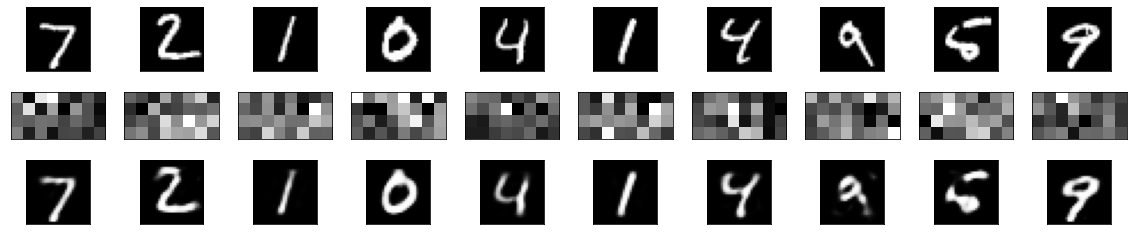

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoded2_img = encoded_imgs[0];
print(encoded2_img[0])

9.346313


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(x, y):
  encoded2_img[0] = x;
  encoded2_img[1] = y;
  decoded2_img = decoder.predict(np.array([encoded2_img]));

  plt.figure(figsize=(4, 4))
  # Display Encoded
  ax = plt.subplot(3, 1, 1)
  plt.imshow(encoded_imgs[0].reshape(4, 8))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Display reconstruction
  ax = plt.subplot(3, 1, 2)
  plt.imshow(decoded2_img.reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

interact(f, x=20, y=20);

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), IntSlider(value=20, description='…

##Deep autoencder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 21ms/step - loss: 0.2449 - val_loss: 0.1666
Epoch 2/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1508 - val_loss: 0.1381
Epoch 3/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1331 - val_loss: 0.1267
Epoch 4/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1233 - val_loss: 0.1177
Epoch 5/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1167 - val_loss: 0.1129
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1123 - val_loss: 0.1093
Epoch 7/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1087 - val_loss: 0.1059
Epoch 8/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1060 - val_loss: 0.1035
Epoch 9/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1037 - val_loss: 0.1021
Epoch 10/100
235/235 [==============================] - 5s 20ms/step - loss: 0.102

313/313 [==============================] - 1s 2ms/step


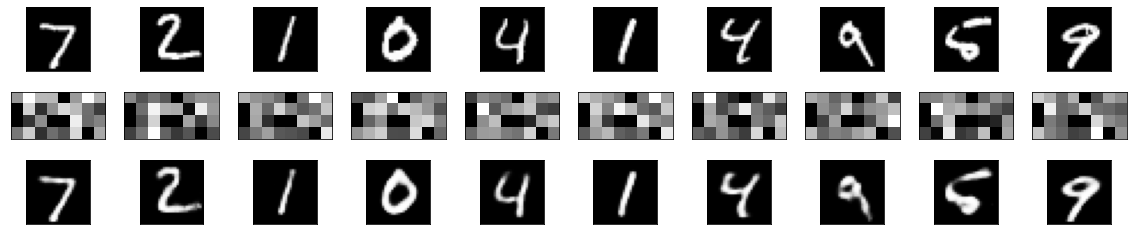

In [ ]:
# autoencoder.summary()

# encoder = keras.Model(input_img, encoded)
# encoded_input = keras.Input(shape=(32,))
# decoder_layer = autoencoder.layers[-1]
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Encoded
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Convolutional autoencoder

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/10
469/469 [==============================] - 84s 178ms/step - loss: 0.1319 - val_loss: 0.1259
Epoch 2/10
469/469 [==============================] - 97s 206ms/step - loss: 0.1223 - val_loss: 0.1180
Epoch 3/10
469/469 [==============================] - 84s 179ms/step - loss: 0.1168 - val_loss: 0.1134
Epoch 4/10
469/469 [==============================] - 85s 182ms/step - loss: 0.1129 - val_loss: 0.1103
Epoch 5/10
469/469 [==============================] - 83s 178ms/step - loss: 0.1102 - val_loss: 0.1078
Epoch 6/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1081 - val_loss: 0.1060
Epoch 7/10
469/469 [==============================] - 83s 176ms/step - loss: 0.1064 - val_loss: 0.1045
Epoch 8/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1051 - val_loss: 0.1036
Epoch 9/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1040 - val_loss: 0.1023
Epoch 10/10
469/469 [==============================] - 82s 175ms/step - l

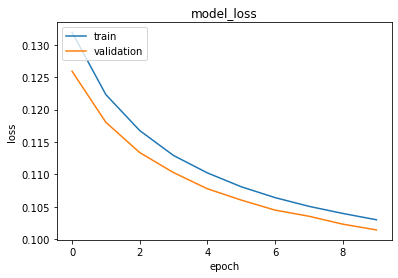

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 3s 8ms/step


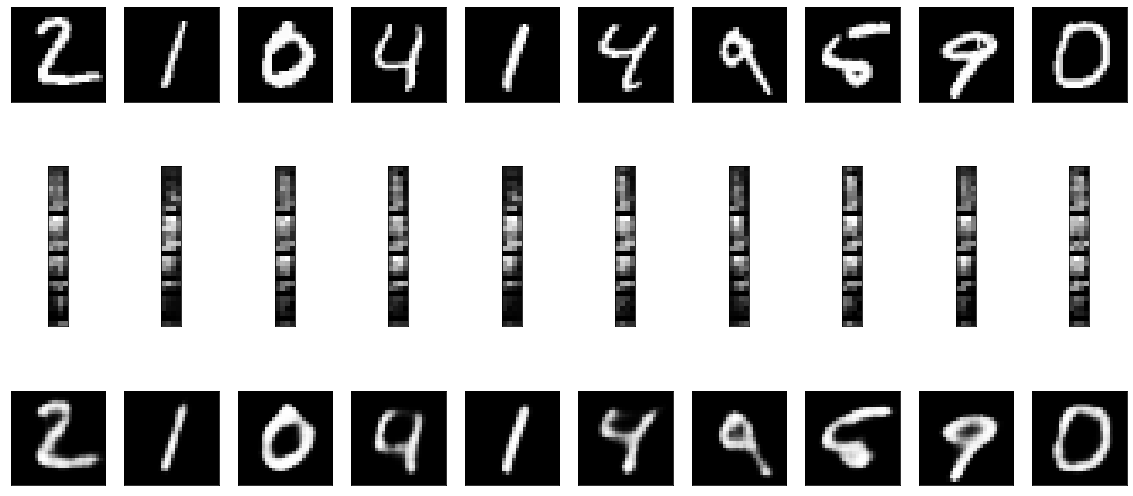

In [ ]:
decoded_imgs = autoencoder.predict(x_test)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded
    ax = plt.subplot(3, n, i + n)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


##To denoising

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

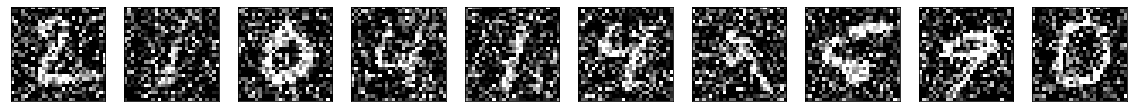

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/2
469/469 [==============================] - 190s 406ms/step - loss: 0.1245 - val_loss: 0.1119
Epoch 2/2
469/469 [==============================] - 166s 353ms/step - loss: 0.1099 - val_loss: 0.1061


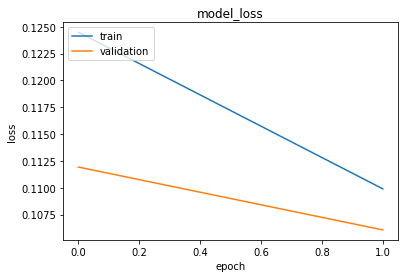

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 3s 10ms/step


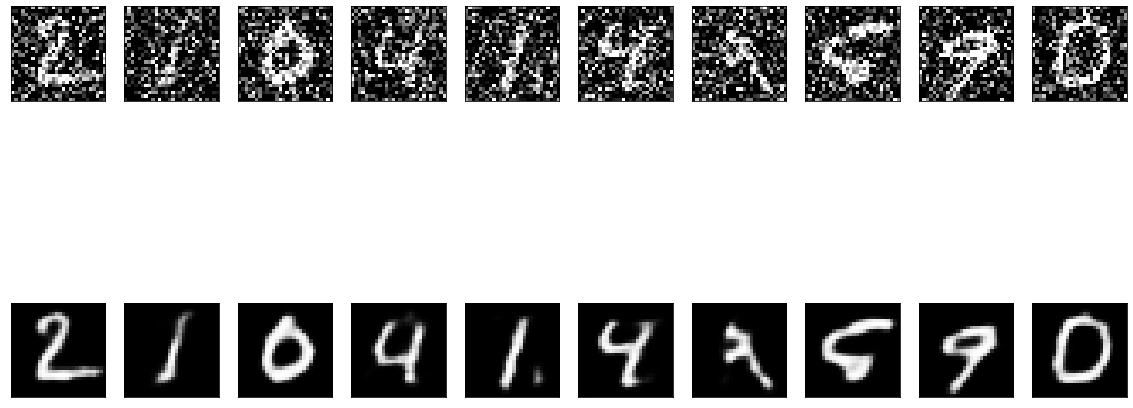

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Variational autoencoder (VAE)

In [ ]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [ ]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [ ]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 64)           50240       ['input_16[0][0]']               
                                                                                                  
 dense_9 (Dense)                (None, 2)            130         ['dense_8[0][0]']                
                                                                                                  
 dense_10 (Dense)               (None, 2)            130         ['dense_8[0][0]']                
                                                                                            

In [ ]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_11 (Dense)            (None, 64)                192       
                                                                 
 dense_12 (Dense)            (None, 784)               50960     
                                                                 
Total params: 51,152
Trainable params: 51,152
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vae.summary()

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 784)]             0         
                                                                 
 encoder (Functional)        [(None, 2),               50500     
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 784)               51152     
                                                                 
Total params: 101,652
Trainable params: 101,652
Non-trainable params: 0
_________________________________________________________________


In [ ]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
vae.summary()

Model: "vae_mlp"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 784)]        0           []                               
                                                                                                  
 encoder (Functional)           [(None, 2),          50500       ['input_16[0][0]']               
                                 (None, 2),                                                       
                                 (None, 2)]                                                       
                                                                                                  
 decoder (Functional)           (None, 784)          51152       ['encoder[0][2]']                
                                                                                            

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))


Epoch 1/100
1875/1875 [==============================] - 14s 7ms/step - loss: 187.0800 - val_loss: 168.3143
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 165.8286 - val_loss: 163.8590
Epoch 3/100
1875/1875 [==============================] - 10s 5ms/step - loss: 162.4107 - val_loss: 161.2015
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 160.1099 - val_loss: 159.3826
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 158.3907 - val_loss: 157.7668
Epoch 6/100
1875/1875 [==============================] - 15s 8ms/step - loss: 157.0023 - val_loss: 156.6364
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 155.8000 - val_loss: 155.4396
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 154.7635 - val_loss: 154.6468
Epoch 9/100
1875/1875 [==============================] - 10s 5ms/step - loss: 153.9374 - val_loss: 153.9033
Epoch 10/100
1875/1875 [====

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step


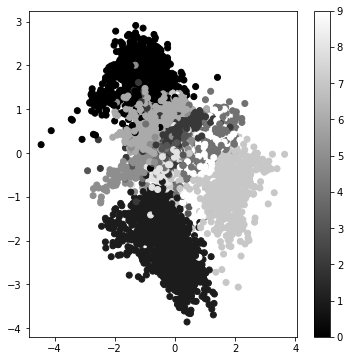

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[0][:, 0], x_test_encoded[0][:, 1], c=y_test)
plt.colorbar()
plt.show()

1/1 [==============================] - 0s 17ms/step


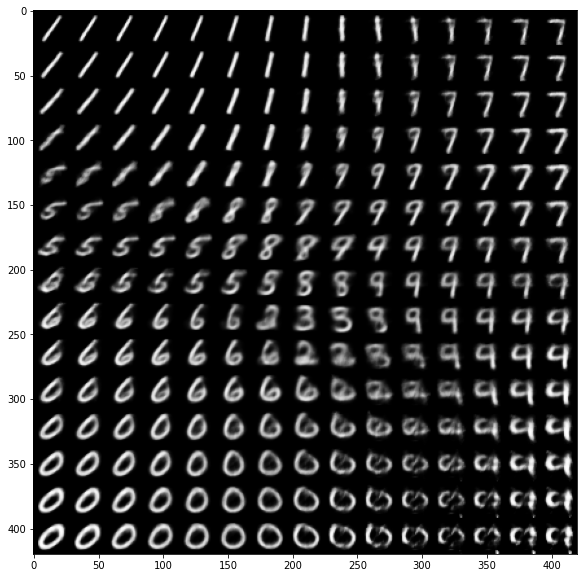

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# We will sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-2, 2, n)
grid_y = np.linspace(-2, 2, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()

# Tests sur les autoencodeurs

## Test décodage par IA : NON conclusif

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
def xor_chiffr(image):
  newImage = (255*image).astype(int)

  for index, value in enumerate(newImage):
    key = random.randint(0, 255)
    newImage[index] = value ^ key
  
  return np.array(newImage / 255)

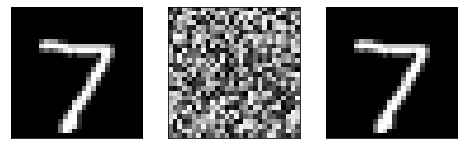

In [ ]:
key = 123

img1 = x_test[0]
random.seed(key)
img2 = xor_chiffr(img1)
random.seed(key)
img3 = xor_chiffr(img2)

plt.figure(figsize=(8, 8))

ax = plt.subplot(1, 3, 1)
plt.imshow(img1.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 2)
plt.imshow(img2.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(1, 3, 3)
plt.imshow(img3.reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
key = 123
np.random.seed(key)

x_train_chiffr = (255*x_train).astype(int)
x_test_chiffr  = (255*x_test).astype(int)

random_image = (255*np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])).astype(int)
x_train_chiffr = np.bitwise_xor(x_train_chiffr, random_image).astype('float32') / 255

np.random.seed(key)
random_image = (255*np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])).astype(int)
x_test_chiffr = np.bitwise_xor(x_test_chiffr, random_image).astype('float32') / 255

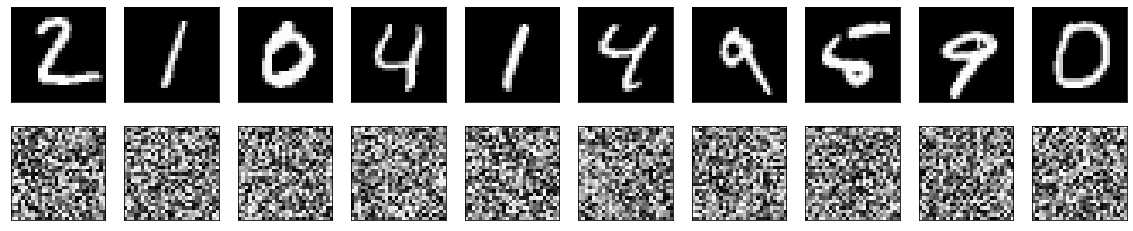

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_chiffr[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


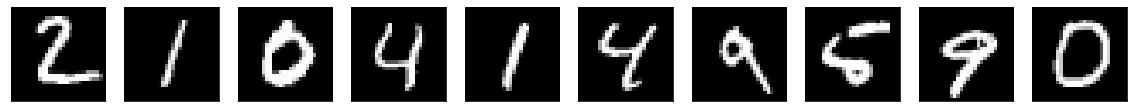

In [ ]:
key = 123
np.random.seed(key)

x_test_dechiffr = (255*x_test_chiffr).astype(int)

random_image = (255*np.random.rand(x_test_dechiffr.shape[0], x_test_dechiffr.shape[1])).astype(int)
x_test_dechiffr = np.bitwise_xor(x_test_dechiffr, random_image).astype('float32') / 255

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_dechiffr[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
history = autoencoder.fit(x_train_chiffr, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_chiffr, x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2944 - val_loss: 0.2634
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2635 - val_loss: 0.2632
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.2635 - val_loss: 0.2633
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.2634 - val_loss: 0.2632
Epoch 5/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2633 - val_loss: 0.2630
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2633 - val_loss: 0.2631
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 8/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2632 - val_loss: 0.2629
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2631 - val_loss: 0.2628
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2631 - val_lo

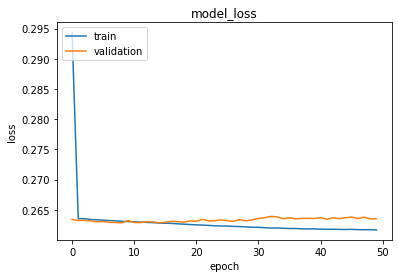

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


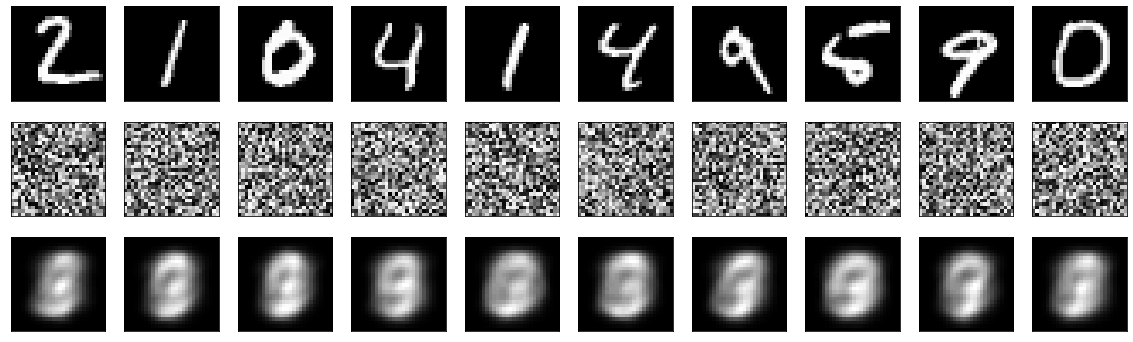

In [ ]:
decoded_imgs = autoencoder.predict(x_test_chiffr)
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_chiffr[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Test avec l'image chiffré : NON conclusif

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(2*784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
key = 123



x_train_chiffr = (255*x_train).astype(int)
x_test_chiffr  = (255*x_test).astype(int)

np.random.seed(key)
random_image = (255*np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])).astype(int)
x_train_chiffr = np.bitwise_xor(x_train_chiffr, random_image).astype('float32') / 255

np.random.seed(key)
random_image = (255*np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])).astype(int)
x_test_chiffr = np.bitwise_xor(x_test_chiffr, random_image).astype('float32') / 255



noise_factor = 0.1
x_train_chiffr_noisy = x_train_chiffr + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_chiffr.shape) 
x_test_chiffr_noisy = x_test_chiffr + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_chiffr.shape) 

x_train_chiffr_noisy = np.clip(x_train_chiffr_noisy, 0., 1.)
x_test_chiffr_noisy = np.clip(x_test_chiffr_noisy, 0., 1.)



x_train_dechiffr_noisy = (255*x_train_chiffr_noisy).astype(int)
x_test_dechiffr_noisy = (255*x_test_chiffr_noisy).astype(int)

np.random.seed(key)
random_image = (255*np.random.rand(x_train_dechiffr_noisy.shape[0], x_train_dechiffr_noisy.shape[1])).astype(int)
x_train_dechiffr_noisy = np.bitwise_xor(x_train_dechiffr_noisy, random_image).astype('float32') / 255

np.random.seed(key)
random_image = (255*np.random.rand(x_test_dechiffr_noisy.shape[0], x_test_dechiffr_noisy.shape[1])).astype(int)
x_test_dechiffr_noisy = np.bitwise_xor(x_test_dechiffr_noisy, random_image).astype('float32') / 255

In [ ]:
x_train_fusion = np.zeros((x_train_dechiffr_noisy.shape[0], x_train_dechiffr_noisy.shape[1]*2))

for i, v in enumerate(x_train_fusion):
  x_train_fusion[i] = np.concatenate((x_train_dechiffr_noisy[i], x_train_chiffr_noisy[i]))

x_test_fusion = np.zeros((x_test_dechiffr_noisy.shape[0], x_test_dechiffr_noisy.shape[1]*2))

for i, v in enumerate(x_test_fusion):
  x_test_fusion[i] = np.concatenate((x_test_dechiffr_noisy[i], x_test_chiffr_noisy[i]))

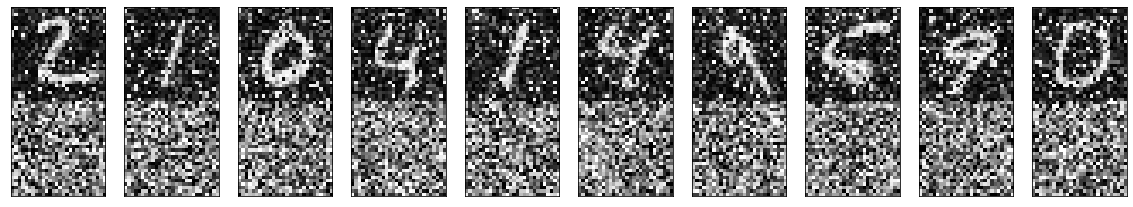

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_fusion[i].reshape(28*2, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
history = autoencoder.fit(x_train_fusion, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_fusion, x_test))

Epoch 1/50
235/235 [==============================] - 4s 15ms/step - loss: 0.2740 - val_loss: 0.2196
Epoch 2/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1979 - val_loss: 0.1797
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1723 - val_loss: 0.1625
Epoch 4/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1577 - val_loss: 0.1509
Epoch 5/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1486 - val_loss: 0.1438
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1428 - val_loss: 0.1395
Epoch 7/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1393 - val_loss: 0.1367
Epoch 8/50
235/235 [==============================] - 6s 25ms/step - loss: 0.1372 - val_loss: 0.1353
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1360 - val_loss: 0.1345
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1353 - val_lo

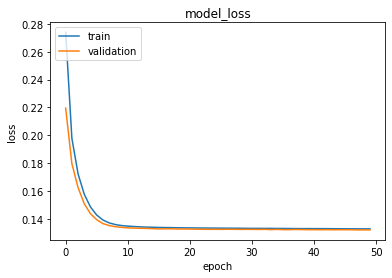

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 4ms/step


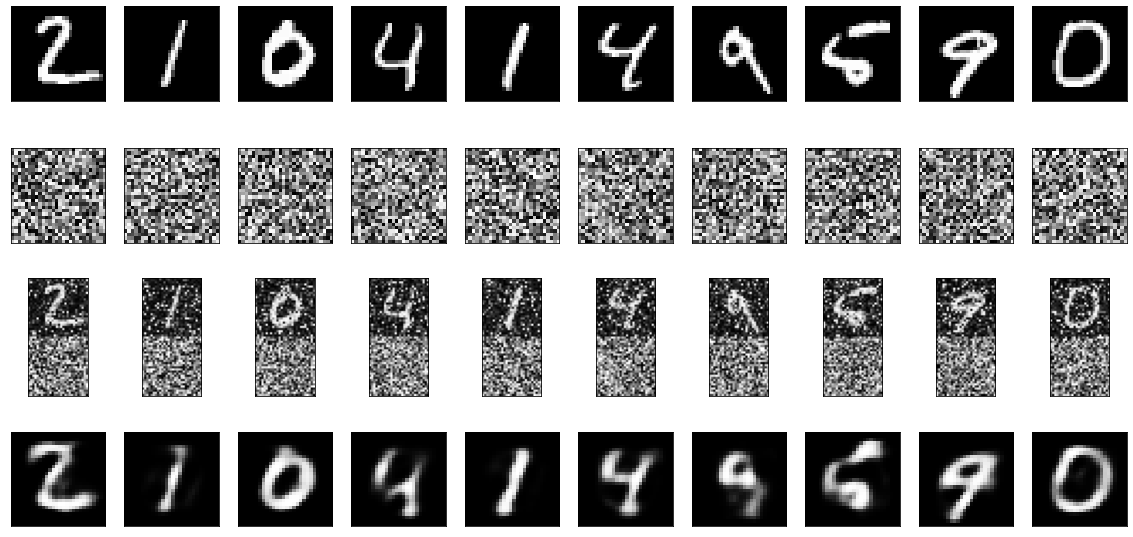

In [ ]:
decoded_imgs = autoencoder.predict(x_test_fusion)

n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(4, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display chiffr
    ax = plt.subplot(4, n, i+ n )
    plt.imshow(x_test_chiffr[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display input (noised)
    ax = plt.subplot(4, n, i + 2*n)
    plt.imshow(x_test_fusion[i].reshape(28*2, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded
    ax = plt.subplot(4, n, i + 3*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)


# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]


# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train_dechiffr_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_dechiffr_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 4s 14ms/step - loss: 0.2827 - val_loss: 0.2173
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1983 - val_loss: 0.1820
Epoch 3/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1733 - val_loss: 0.1621
Epoch 4/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1565 - val_loss: 0.1482
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1446 - val_loss: 0.1379
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1360 - val_loss: 0.1316
Epoch 7/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1307 - val_loss: 0.1272
Epoch 8/50
235/235 [==============================] - 8s 34ms/step - loss: 0.1265 - val_loss: 0.1234
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1239 - val_loss: 0.1216
Epoch 10/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1224 - val_lo

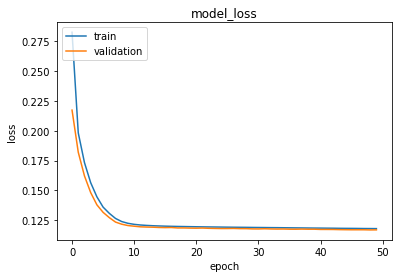

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 3ms/step


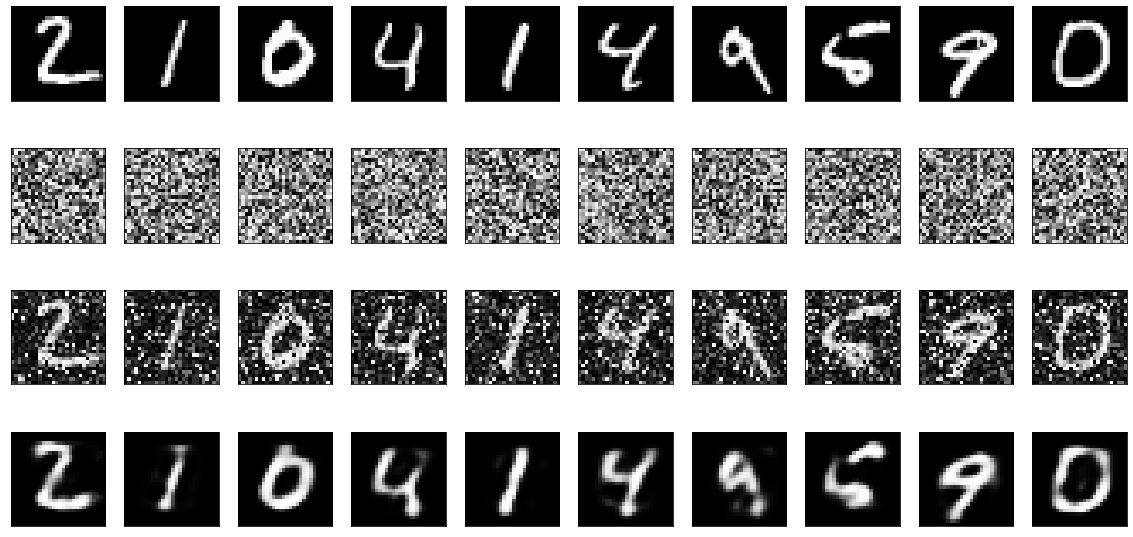

In [ ]:
decoded_imgs = autoencoder.predict(x_test_dechiffr_noisy)

n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(4, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display chiffr
    ax = plt.subplot(4, n, i+ n )
    plt.imshow(x_test_chiffr[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display input (noised)
    ax = plt.subplot(4, n, i + 2*n)
    plt.imshow(x_test_dechiffr_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display decoded
    ax = plt.subplot(4, n, i + 3*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Detection d'erreurs : Conclusif

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(8, (3, 3), activation='relu')(input_img)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

is_noise_class = keras.Model(input_img, x)
is_noise_class.summary()
is_noise_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0     

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
def generateData(key = 123, noise_factor = 0.5, if_error_proba = 0.5):
  x_train_chiffr = (255*x_train).astype(int)
  x_test_chiffr  = (255*x_test).astype(int)

  np.random.seed(key)
  random_image = (255*np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])).astype(int)
  x_train_chiffr = np.bitwise_xor(x_train_chiffr, random_image).astype('float32') / 255

  np.random.seed(key)
  random_image = (255*np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])).astype(int)
  x_test_chiffr = np.bitwise_xor(x_test_chiffr, random_image).astype('float32') / 255



  np.random.seed(key)
  y_train = np.random.rand(x_train_chiffr.shape[0]) > 0.5
  random_noise = np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])
  random_noise[random_noise > if_error_proba] = 0
  x_train_chiffr_noisy = np.copy(x_train_chiffr)
  x_train_chiffr_noisy[y_train] = x_train_chiffr_noisy[y_train] + noise_factor * random_noise[y_train]
  y_train = y_train.astype(int)

  np.random.seed(key)
  y_test = np.random.rand(x_test_chiffr.shape[0]) > 0.5
  random_noise = np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])
  random_noise[random_noise > if_error_proba] = 0
  x_test_chiffr_noisy = np.copy(x_test_chiffr)
  x_test_chiffr_noisy[y_test] = x_test_chiffr_noisy[y_test] + noise_factor * random_noise[y_test]
  y_test = y_test.astype(int)

  x_train_chiffr_noisy = np.clip(x_train_chiffr_noisy, 0., 1.)
  x_test_chiffr_noisy = np.clip(x_test_chiffr_noisy, 0., 1.)



  x_train_dechiffr_noisy = (255*x_train_chiffr_noisy).astype(int)
  x_test_dechiffr_noisy = (255*x_test_chiffr_noisy).astype(int)

  np.random.seed(key)
  random_image = (255*np.random.rand(x_train_dechiffr_noisy.shape[0], x_train_dechiffr_noisy.shape[1])).astype(int)
  x_train_dechiffr_noisy = np.bitwise_xor(x_train_dechiffr_noisy, random_image).astype('float32') / 255

  np.random.seed(key)
  random_image = (255*np.random.rand(x_test_dechiffr_noisy.shape[0], x_test_dechiffr_noisy.shape[1])).astype(int)
  x_test_dechiffr_noisy = np.bitwise_xor(x_test_dechiffr_noisy, random_image).astype('float32') / 255

  return (x_train_dechiffr_noisy.reshape(-1, 28, 28, 1), y_train), (x_test_dechiffr_noisy.reshape(-1, 28, 28, 1), y_test)

In [ ]:
import math
def afficher_img(X,Xnames, figsize = (50,50), color = 'gray') :

  f = plt.figure(figsize=figsize)

  nb_lin = math.sqrt(len(X))
  nb_lin = math.trunc(nb_lin)
  nb_col = (len(X) / nb_lin)+1


  index = 0
  for images in X :
    f.add_subplot(nb_lin, nb_col, index+1)
    ax = plt.gca()
    
    #ax.get_xaxis().set_visible(False)
    ax.axes.xaxis.set_ticklabels([])
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.xlabel(Xnames[index])
    plt.imshow(images, color)
    index+=1
  plt.show()


np non bruite :  29881
np bruite     :  30119


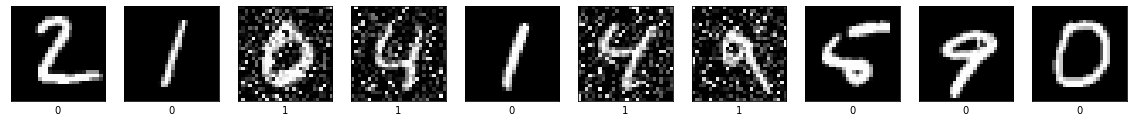

In [ ]:
(x_train_dechiffr_noisy, y_train), (x_test_dechiffr_noisy, y_test) = generateData(noise_factor = 0.5, if_error_proba = 0.5)
print("np non bruite : ", np.count_nonzero(y_train == False))
print("np bruite     : ", np.count_nonzero(y_train))

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.xlabel(y_test[i])
    plt.imshow(x_test_dechiffr_noisy[i][:, :, 0])
    plt.gray()
    ax.set_xticks([])
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
epoch = 16
history = []
for e in range(epoch):
  print("Epoch", e+"/"+epoch)
  (x_train_dechiffr_noisy, y_train), (x_test_dechiffr_noisy, y_test) = generateData(key = e)
  history += [is_noise_class.fit(x_train_dechiffr_noisy, y_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_dechiffr_noisy, y_test))]

235/235 [==============================] - 20s 84ms/step - loss: 2.7611e-07 - val_loss: 2.3436e-07


KeyboardInterrupt: ignored

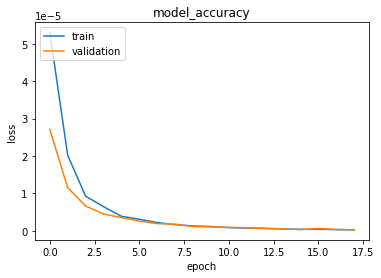

In [ ]:
history_loss = []
history_val_loss = []
for h in history:
  history_loss += h.history['loss']
  history_val_loss += h.history['val_loss']

plt.plot(history_loss)
plt.plot(history_val_loss)
plt.title('model_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 3s 9ms/step


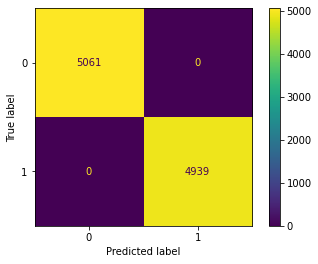

In [ ]:
class estimator:
  _estimator_type = ''
  classes_ = []
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = 'classifier'
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

class_names = ['0', '1']

classifier = estimator(is_noise_class, class_names)

plot_confusion_matrix(estimator=classifier, X=x_test_dechiffr_noisy, y_true=y_test)

##Detection des positions d'erreurs : NON conclusif

In [ ]:
#CNN
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #mean_absolute_error

#NN
# # This is the size of our encoded representations
# encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # This is our input image
# input_img = keras.Input(shape=(784,))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(784, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

# # This model maps an input to its encoded representation
# encoder = keras.Model(input_img, encoded)

# # This is our encoded (32-dimensional) input
# encoded_input = keras.Input(shape=(encoding_dim,))
# # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]

# # Create the decoder model
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

#DATA
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

#On veut : 
#Entrée : image (bruité ou non)
#Sortie : position du bruit (pixel tester normal ou à 0 et 1)

(60000, 784)
(10000, 784)


In [ ]:
def generateData(key = 123, noise_factor = 0.5, error_proba = 0.5, if_error_proba = 0.5):
  x_train_chiffr = (255*x_train).astype(int)
  x_test_chiffr  = (255*x_test).astype(int)

  np.random.seed(key)
  cypher_random_image_train = (255*np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])).astype(int)
  x_train_chiffr = np.bitwise_xor(x_train_chiffr, cypher_random_image_train).astype('float32') / 255

  np.random.seed(key)
  cypher_random_image_test = (255*np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])).astype(int)
  x_test_chiffr = np.bitwise_xor(x_test_chiffr, cypher_random_image_test).astype('float32') / 255



  np.random.seed(key)
  id_noised = np.random.rand(x_train_chiffr.shape[0]) < error_proba
  random_noise = np.random.rand(x_train_chiffr.shape[0], x_train_chiffr.shape[1])
  random_noise[random_noise > if_error_proba] = 0
  x_train_chiffr_noisy = np.copy(x_train_chiffr)
  x_train_chiffr_noisy[id_noised] = x_train_chiffr_noisy[id_noised] + noise_factor * random_noise[id_noised]

  np.random.seed(key)
  id_noised = np.random.rand(x_test_chiffr.shape[0]) < error_proba
  random_noise = np.random.rand(x_test_chiffr.shape[0], x_test_chiffr.shape[1])
  random_noise[random_noise > if_error_proba] = 0
  x_test_chiffr_noisy = np.copy(x_test_chiffr)
  x_test_chiffr_noisy[id_noised] = x_test_chiffr_noisy[id_noised] + noise_factor * random_noise[id_noised]

  x_train_chiffr_noisy = np.clip(x_train_chiffr_noisy, 0., 1.)
  x_test_chiffr_noisy = np.clip(x_test_chiffr_noisy, 0., 1.)



  x_train_dechiffr_noisy = (255*x_train_chiffr_noisy).astype(int)
  x_test_dechiffr_noisy = (255*x_test_chiffr_noisy).astype(int)

  x_train_dechiffr_noisy = np.bitwise_xor(x_train_dechiffr_noisy, cypher_random_image_train).astype('float32') / 255

  x_test_dechiffr_noisy = np.bitwise_xor(x_test_dechiffr_noisy, cypher_random_image_test).astype('float32') / 255

  y_train = np.clip((0.5 + 0.5*(x_train_dechiffr_noisy - x_train))*(1/784), 0., 1.).astype('float32')
  y_test  = np.clip((0.5 + 0.5*(x_test_dechiffr_noisy  - x_test ))*(1/784), 0., 1.).astype('float32')

  return (x_train_dechiffr_noisy.reshape(-1, 28, 28, 1), y_train.reshape(-1,  28, 28, 1)), (x_test_dechiffr_noisy.reshape(-1,  28, 28, 1), y_test.reshape(-1,  28, 28, 1))

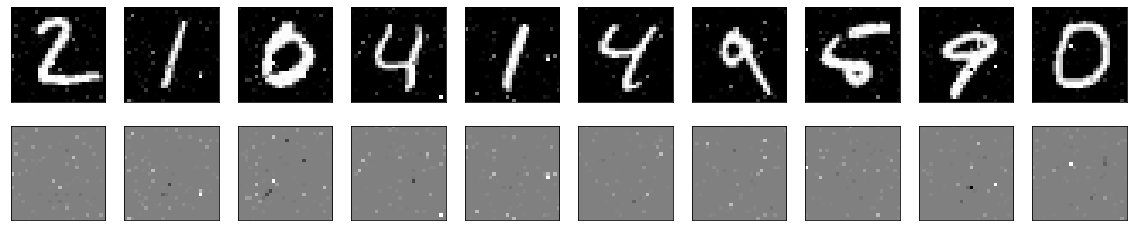

In [ ]:
(x_train_dechiffr_noisy, y_train), (x_test_dechiffr_noisy, y_test) = generateData(noise_factor = 0.5, error_proba=1.0, if_error_proba = 0.1)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_dechiffr_noisy[i][:, :, 0]) #.reshape(28, 28)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(y_test[i][:, :, 0]*784, vmin = 0, vmax = 1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
epoch = 16
history = []
for e in range(epoch):
  print("Epoch", str(e+1)+"/"+str(epoch))
  (x_train_dechiffr_noisy, y_train), (x_test_dechiffr_noisy, y_test) = generateData(key = e, noise_factor = 0.5, error_proba=1.0, if_error_proba = 0.1)
  history += [autoencoder.fit(x_train_dechiffr_noisy, y_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_dechiffr_noisy, y_test))]

Epoch 1/16
235/235 [==============================] - 82s 350ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 2/16
235/235 [==============================] - 81s 346ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 3/16
235/235 [==============================] - 82s 348ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 4/16
235/235 [==============================] - 83s 352ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 5/16
235/235 [==============================] - 85s 361ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 6/16
235/235 [==============================] - 81s 346ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 7/16
235/235 [==============================] - 81s 345ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 8/16
235/235 [==============================] - 83s 352ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 9/16
235/235 [==============================] - 81s 346ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/16
235/235 [==============================] - 87s 370ms/step - l

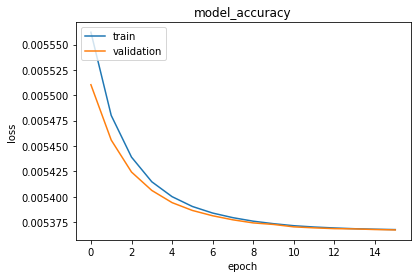

In [ ]:
history_loss = []
history_val_loss = []
for h in history:
  history_loss += h.history['loss']
  history_val_loss += h.history['val_loss']

plt.plot(history_loss)
plt.plot(history_val_loss)
plt.title('model_accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 8s 24ms/step


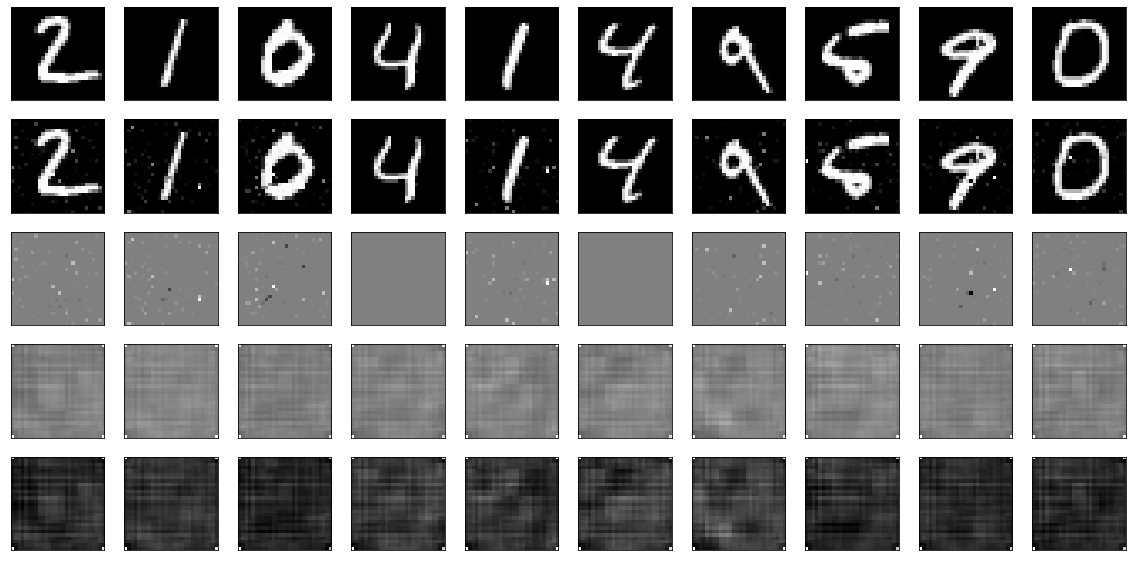

In [ ]:
(x_train_dechiffr_noisy, y_train), (x_test_dechiffr_noisy, y_test) = generateData(key = 123, noise_factor = 0.5, error_proba=0.7, if_error_proba = 0.1)
decoded_imgs = autoencoder.predict(x_test_dechiffr_noisy)

n = 10
nb_row = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(nb_row, n, i)
    plt.imshow(x_test[i].reshape(28, 28), vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noised
    ax = plt.subplot(nb_row, n, i+ n )
    plt.imshow(x_test_dechiffr_noisy[i][:, :, 0], vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display goal
    ax = plt.subplot(nb_row, n, i+ 2*n )
    plt.imshow(y_test[i][:, :, 0]*784, vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display output
    ax = plt.subplot(nb_row, n, i + 3*n)
    plt.imshow(decoded_imgs[i][:, :, 0]*784, vmin=0, vmax=1)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display output normalized
    ax = plt.subplot(nb_row, n, i + 4*n)
    plt.imshow(decoded_imgs[i][:, :, 0]*784)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application sur les images pour le débruitage

## Import

In [ ]:
#CNN lib
import tensorflow as tf
from tensorflow import keras

#Viewing data lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#Image processing lib
import cv2

#Util lib
import random
import math
import copy


#FOR DRIVE IMAGES MANIPULATION
import os, glob
from os import listdir
from os.path import isfile, join
from google.colab import drive

def goToDriveFile() :
  my_doc_name = 'HAI927I - Projet CNN'
  my_image_db_folder = 'Images'


  %cd '/content/'
  drive.mount(os.getcwd() + '/drive')
  my_path = glob.glob(os.getcwd() + '/**/' + my_doc_name, recursive = True)

  my_path = [my_i for my_i in my_path if len(my_i) in [max([len(my_i) for my_i in my_path])]][0]; 
  my_path += '/' + my_image_db_folder
  %cd $my_path



def readAllImagesFromFilePath(filespath):
  goToDriveFile()
  img_names = []
  img_path = []

  for filepath in filespath :
    #we need to try to read all data in the file path
    if(filepath[-1] == '*'):
      filepath = filepath[:-1]
      imgndir = [ f for f in listdir(filepath) if isfile(join(filepath,f)) ]
      for name in imgndir :
        img_names.append(name)
        img_path.append(join(filepath,name))

    #we need to try to read unic data in the file path
    else :
       if isfile(filepath) :
         img_names.append(os.path.basename(filepath).split('/')[-1])
         img_path.append(filepath)

  img_data = []
  for img_p in img_path :
    img_data.append(cv2.cvtColor(cv2.imread(img_p), cv2.COLOR_BGR2RGB))
  
  return img_data, img_names

def afficher_img(X,Xnames, figsize = (50,50), color = 'gray', axis = -1) :

  f = plt.figure(figsize=figsize)

  nb_lin = 0
  nb_col = 0
  if (axis ==  0) :
         nb_col = len(X)
         nb_lin = 1
  else :
     if (axis ==  1) :
         nb_lin = len(X)
         nb_col = 1
     else:
        nb_lin = math.sqrt(len(X))
        nb_lin = math.trunc(nb_lin)
        nb_col = (len(X) / nb_lin)+1


  index = 0
  for images in X :
    f.add_subplot(nb_lin, nb_col, index+1)
    ax = plt.gca()
    plt.subplots_adjust(hspace=0)
    
    #ax.get_xaxis().set_visible(False)
    ax.axes.xaxis.set_ticklabels([])
    ax.set_xticks([])
    ax.spines['bottom'].set_visible(False)
    ax.get_yaxis().set_visible(False)

    plt.xlabel(Xnames[index])
    plt.imshow(images, color)
    index+=1
  plt.show()

def noiseImg_withrange(img, start = (0,0), end = (0,0), nb_pix_in_block_to_noise = 1, bit_mask = (0,0,0,0,0,0,0,0)) :
  mask_val = 0

  dim_x = end[0] - start[0]
  dim_y = end[1] - start[1]
  positions = random.sample(range(0,dim_x*dim_y), nb_pix_in_block_to_noise) 

  if(type(bit_mask) is tuple) :
   reversed(bit_mask)
   for i in range(0,8) :
     mask_val += (bit_mask[i] << i)
  else:
    if(type(bit_mask) is int) :
      mask_val = bit_mask
    else:
      raise Exception("Sorry, only 8 long tuples or int are accepted as bit_mask val")

  for pos in positions :
    y = math.trunc(pos / dim_x)
    x = pos - y * dim_x
    x += start[0]
    y += start[1]

    img[x,y,2] ^= mask_val 
    img[x,y,1] ^= mask_val 
    img[x,y,0] ^= mask_val 



def noiseAllImg(img, bit_mask = (0,0,0,0,0,0,0,0)) :
  noiseAllImg(img,(0,0),(len(img[0]), len(img)), len(img[0]) * len(img),bit_mask)


def noiseAllImg_block(img, block_size = (1,1), bit_mask = (0,0,0,0,0,0,0,0), block_noised_probability = 0.5, nb_pix_in_block_to_noise = 1) :
  nb_block_x = len(img[0]) // block_size[0]
  nb_block_y = len(img) // block_size[1]

  print(nb_block_x)
  print(nb_block_y)

  for i in range(0,nb_block_y): 
   for j in range(0,nb_block_x):

     rdm = random.random()
     if(rdm >= block_noised_probability) :
        start_b = (j * block_size[0],i * block_size[1])
        end_b = ((j+1) * block_size[0],(i+1) * block_size[1])

        noiseImg_withrange(img, start =start_b , end =end_b , nb_pix_in_block_to_noise = nb_pix_in_block_to_noise, bit_mask = bit_mask)


## Génération data

### Ouverture d'images en blocks

In [ ]:
goToDriveFile()

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1ixxZUun0ec2b2xNf6So6TFLfKhOuHVjn/HAI927I - Projet CNN/Images


In [ ]:
img_data_original, img_names_original = readAllImagesFromFilePath(["./*"])

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1ixxZUun0ec2b2xNf6So6TFLfKhOuHVjn/HAI927I - Projet CNN/Images


In [ ]:
def imgToBlocks(img_data_original, bl_height = 16, bl_width = 16, pad_v = 1, pad_h = 1):
  img_data = []
  for img in img_data_original:
    irange = img.shape[0] - bl_height
    jrange = img.shape[1] - bl_width
    if irange <= 0 or jrange <= 0:
      continue
    for i in range(0, irange, pad_v):
      for j in range(0, jrange, pad_h):
        for c in range(3):
          img_data.append(np.copy(img[i:i+bl_height, j:j+bl_width, c]).reshape(1, bl_height, bl_width).astype(int))

  return np.array(img_data)

In [ ]:
img_data = imgToBlocks([img_data_original[0]], pad_v = 1, pad_h = 1)

In [ ]:
a = np.arange(1 * 3 * 3).reshape(1, 3, 3)

print(a[:, range(2)])

[[[0 1 2]
  [3 4 5]]]


In [ ]:
print(img_data.shape)
#afficher_img([img_data[0], img_data[3], img_data[6]],['img 0', 'img 1', 'img 2'])

(130296, 1, 16, 16)


### Séparation en test et train

In [ ]:
def getTestTrain(images, percentTest):
  imgTestSelect = np.random.rand(images.shape[0])
  x_test = np.copy(images[imgTestSelect < percentTest])
  x_train = np.copy(images[imgTestSelect > percentTest])
  return x_train, x_test 

In [ ]:
x_train, x_test = getTestTrain(img_data, 0.2)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 16, 16, 1))
x_test = np.reshape(x_test, (len(x_test), 16, 16, 1))

print(x_train.shape)
print(x_test.shape)

(104065, 16, 16, 1)
(26231, 16, 16, 1)


In [ ]:
np.random.rand(10)

array([0.20084222, 0.43782518, 0.08386658, 0.17248241, 0.97111763,
       0.42764504, 0.82147632, 0.76303615, 0.63613791, 0.01201537])

### Ajout de bruit

In [ ]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

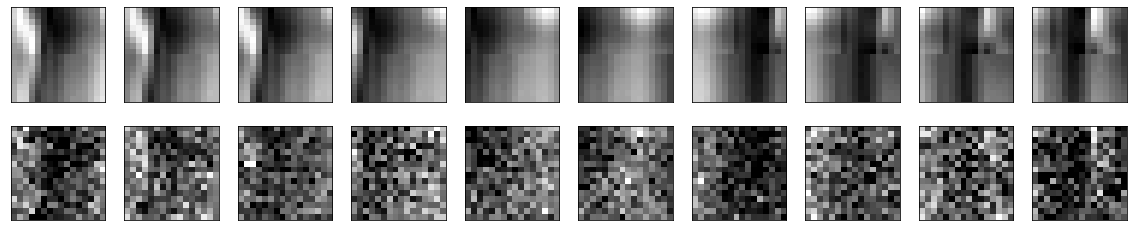

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i][:, :, 0]) #.reshape(28, 28)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_noisy[i][:, :, 0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Autoencodeur

In [ ]:
input_img = keras.Input(shape=(16, 16, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=16,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/16
814/814 [==============================] - 95s 117ms/step - loss: 0.4734 - val_loss: 0.4634
Epoch 2/16
814/814 [==============================] - 88s 109ms/step - loss: 0.4659 - val_loss: 0.4630
Epoch 3/16
814/814 [==============================] - 88s 108ms/step - loss: 0.4656 - val_loss: 0.4629
Epoch 4/16
814/814 [==============================] - 87s 107ms/step - loss: 0.4655 - val_loss: 0.4628
Epoch 5/16
814/814 [==============================] - 87s 107ms/step - loss: 0.4653 - val_loss: 0.4627
Epoch 6/16
814/814 [==============================] - 87s 107ms/step - loss: 0.4653 - val_loss: 0.4626
Epoch 7/16
814/814 [==============================] - 101s 124ms/step - loss: 0.4652 - val_loss: 0.4626
Epoch 8/16
814/814 [==============================] - 106s 130ms/step - loss: 0.4652 - val_loss: 0.4625
Epoch 9/16
814/814 [==============================] - 98s 121ms/step - loss: 0.4651 - val_loss: 0.4625
Epoch 10/16
814/814 [==============================] - 87s 107ms/step -

In [ ]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
autoencoder.save('../Code/Models/ImageBlockCNNAutoencoder')

In [ ]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
autoencoder = model = keras.models.load_model('../Code/Models/ImageBlockCNNAutoencoder')

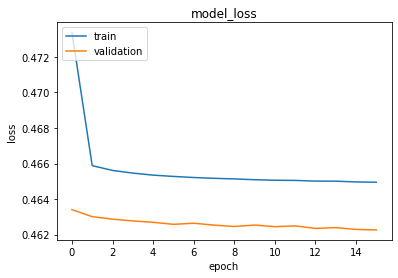

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

818/818 [==============================] - 6s 7ms/step


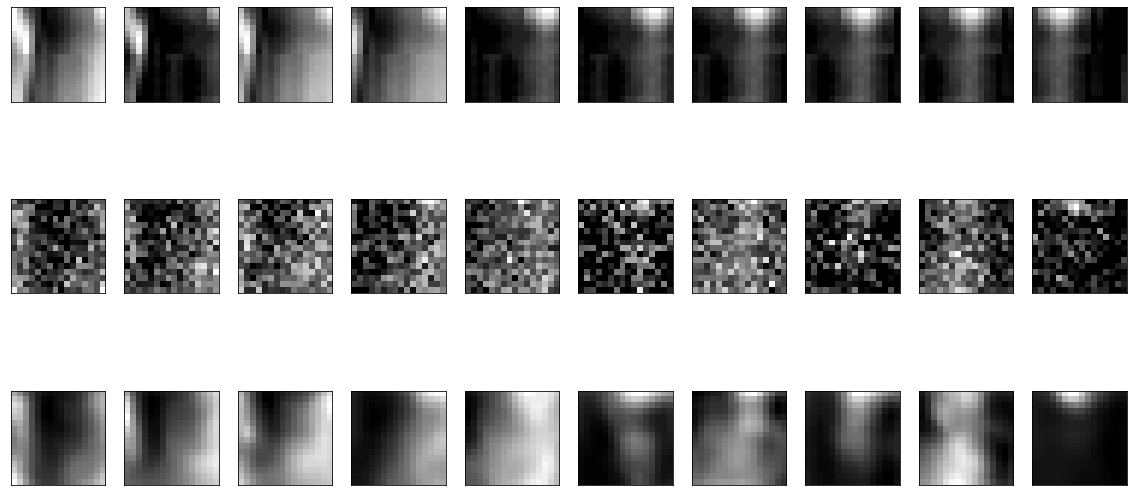

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)


n = 10
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noised
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Test Double autoencodeur : NON conclusif

In [ ]:
input_img = keras.Input(shape=(16, 16, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded1 = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded1)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded1 = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decodedRELU = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decodedRELU)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded2 = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded2)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded2 = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded1)
doubleAutoencoder = keras.Model(input_img, decoded2)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
doubleAutoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# autoencoder.fit(x_train_noisy, x_train,
#                 epochs=4,
#                 batch_size=128,
#                 shuffle=True,
#                 validation_data=(x_test_noisy, x_test))
history = doubleAutoencoder.fit(x_train_noisy, x_train,
                epochs=4,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/4
814/814 [==============================] - 231s 284ms/step - loss: 0.4694 - val_loss: 0.4665
Epoch 2/4
814/814 [==============================] - 167s 205ms/step - loss: 0.4657 - val_loss: 0.4662
Epoch 3/4
814/814 [==============================] - 167s 205ms/step - loss: 0.4654 - val_loss: 0.4662
Epoch 4/4
814/814 [==============================] - 166s 204ms/step - loss: 0.4653 - val_loss: 0.4657


In [ ]:
epoch = 4
historyS = []
historyD = []
for e in range(epoch):
  print("Epoch", str(e)+"/"+str(epoch))
  historyS += [autoencoder.fit(x_train_noisy, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))]
  historyD += [doubleAutoencoder.fit(x_train_noisy, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))]

Epoch 0/4
407/407 [==============================] - 165s 404ms/step - loss: 0.4675 - val_loss: 0.4661
Epoch 1/4
407/407 [==============================] - 158s 388ms/step - loss: 0.4672 - val_loss: 0.4660
Epoch 2/4
407/407 [==============================] - 158s 389ms/step - loss: 0.4664 - val_loss: 0.4659
Epoch 3/4
407/407 [==============================] - 159s 390ms/step - loss: 0.4657 - val_loss: 0.4657


In [ ]:
autoencoder.save('../Code/Models/ImageBlockCNNAutoencoderHalf')
doubleAutoencoder.save('../Code/Models/ImageBlockCNNDoubleAutoencoder')
#autoencoder = model = keras.models.load_model('../Code/Models/ImageBlockCNNAutoencoder')

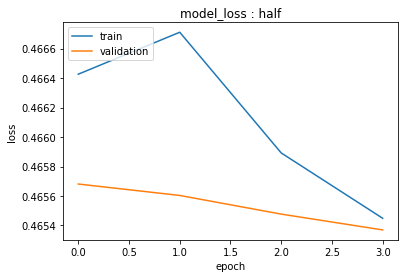

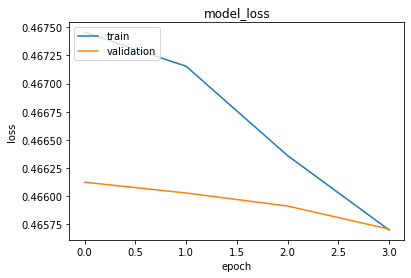

In [ ]:
history_loss = []
history_val_loss = []
for h in historyS:
  history_loss += h.history['loss']
  history_val_loss += h.history['val_loss']

plt.plot(history_loss)
plt.plot(history_val_loss)
plt.title('model_loss : half')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

history_loss = []
history_val_loss = []
for h in historyD:
  history_loss += h.history['loss']
  history_val_loss += h.history['val_loss']

plt.plot(history_loss)
plt.plot(history_val_loss)
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

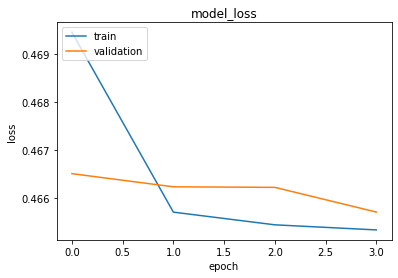

In [ ]:
doubleAutoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 17ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1/1 [==============================] - 0s 20ms/step


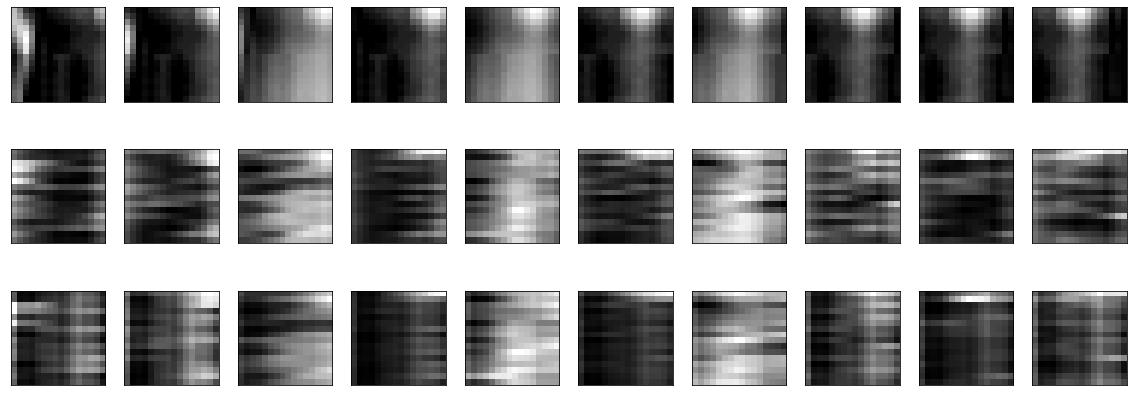

In [ ]:
n = 10
nb = 4
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    semi_decoded_img = autoencoder.predict([x_test_noisy[i]])
    decoded_img = doubleAutoencoder.predict([x_test_noisy[i]])

    # Display original
    ax = plt.subplot(nb, n, i)
    plt.imshow(x_test[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noised
    ax = plt.subplot(nb, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(16, 16))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display semi_reconstruction
    ax = plt.subplot(nb, n, i + n)
    plt.imshow(semi_decoded_img[:, :, 0, 0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(nb, n, i + 2*n)
    plt.imshow(decoded_img[:, :, 0, 0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Test autoencoder RGB : Conclusif

In [ ]:
def imgToBlocksRGB(img_data_original, bl_height = 16, bl_width = 16, pad_v = 1, pad_h = 1):
  img_data = []
  for img in img_data_original:
    irange = img.shape[0] - bl_height
    jrange = img.shape[1] - bl_width
    if irange <= 0 or jrange <= 0:
      continue
    for i in range(0, irange, pad_v):
      for j in range(0, jrange, pad_h):
          img_data.append(np.copy(img[i:i+bl_height, j:j+bl_width]).reshape(1, bl_height, bl_width, 3).astype(int))

  return np.array(img_data)

(43432, 1, 16, 16, 3)


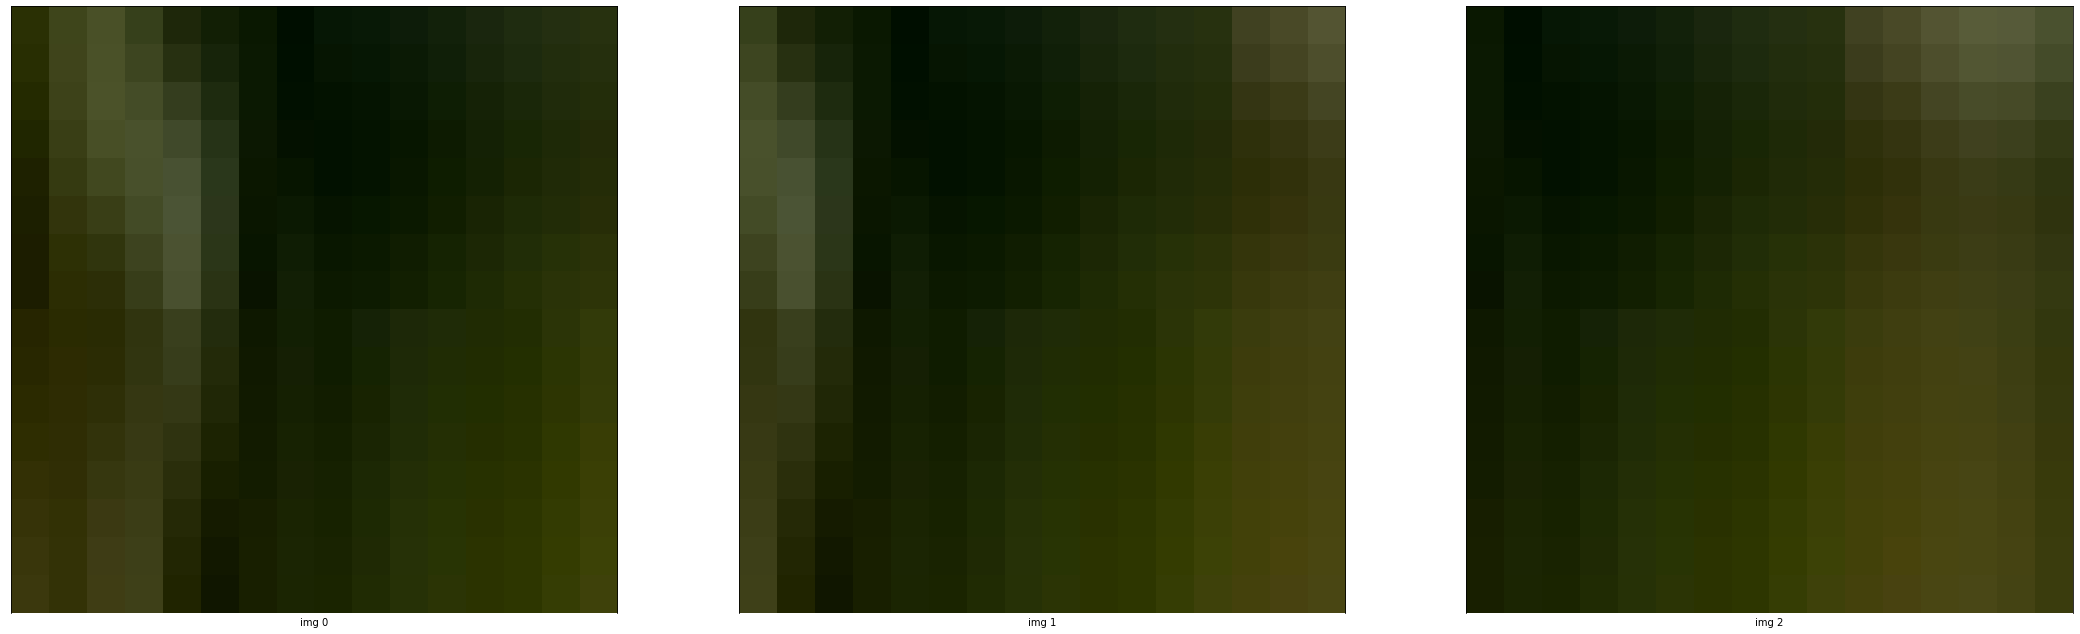

In [ ]:
img_data_RGB = imgToBlocksRGB([img_data_original[0]], pad_v = 1, pad_h = 1)
print(img_data_RGB.shape)
afficher_img([img_data_RGB[0].reshape(16, 16, 3), img_data_RGB[3].reshape(16, 16, 3), img_data_RGB[6].reshape(16, 16, 3)],['img 0', 'img 1', 'img 2'])

In [ ]:
x_train, x_test = getTestTrain(img_data_RGB, 0.2)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 16, 16, 3))
x_test = np.reshape(x_test, (len(x_test), 16, 16, 3))

print(x_train.shape)
print(x_test.shape)

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(34890, 16, 16, 3)
(8542, 16, 16, 3)


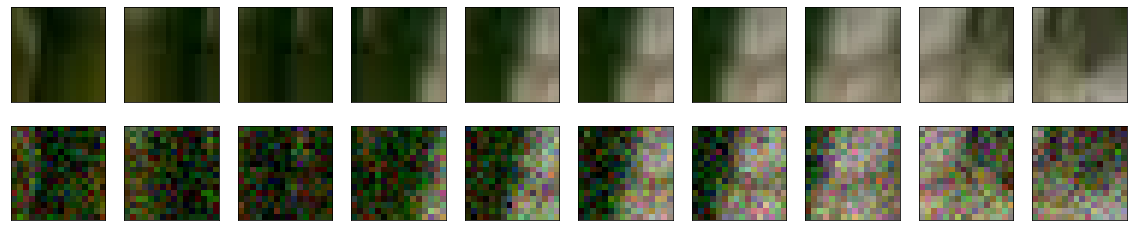

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i][:, :]) #.reshape(28, 28)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_noisy[i][:, :])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(16, 16, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=16,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/16
273/273 [==============================] - 38s 137ms/step - loss: 0.4880 - val_loss: 0.4704
Epoch 2/16
273/273 [==============================] - 38s 138ms/step - loss: 0.4670 - val_loss: 0.4690
Epoch 3/16
273/273 [==============================] - 37s 137ms/step - loss: 0.4659 - val_loss: 0.4684
Epoch 4/16
273/273 [==============================] - 39s 145ms/step - loss: 0.4654 - val_loss: 0.4680
Epoch 5/16
273/273 [==============================] - 39s 144ms/step - loss: 0.4651 - val_loss: 0.4681
Epoch 6/16
273/273 [==============================] - 37s 135ms/step - loss: 0.4649 - val_loss: 0.4676
Epoch 7/16
273/273 [==============================] - 37s 135ms/step - loss: 0.4647 - val_loss: 0.4673
Epoch 8/16
273/273 [==============================] - 37s 136ms/step - loss: 0.4646 - val_loss: 0.4674
Epoch 9/16
273/273 [==============================] - 37s 136ms/step - loss: 0.4645 - val_loss: 0.4672
Epoch 10/16
273/273 [==============================] - 39s 144ms/step - l

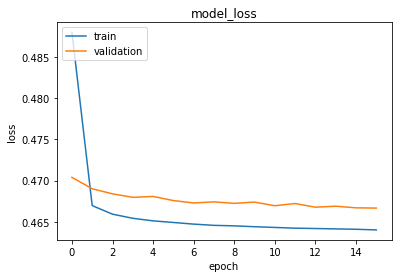

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

269/269 [==============================] - 3s 9ms/step


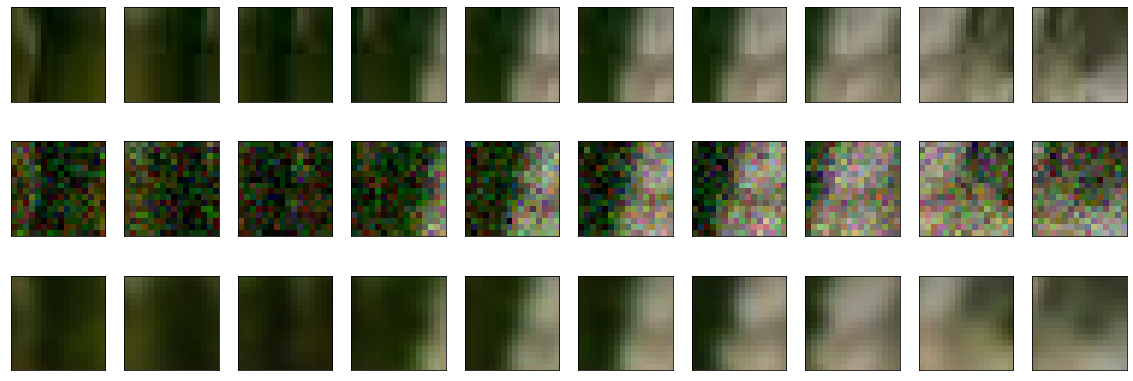

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 7))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(16, 16, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noised
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(16, 16, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(16, 16, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
#autoencoder.save('../Code/Models/ImageBlockRgbCnnAutoencoder')
#autoencoder = model = keras.models.load_model('../Code/Models/ImageBlockRgbCnnAutoencoder')

In [ ]:
height = 16
width = 16

## Test autoencodeur RGB avec des blocs de grande taille :  Conclusif

(25480, 1, 64, 64, 3)


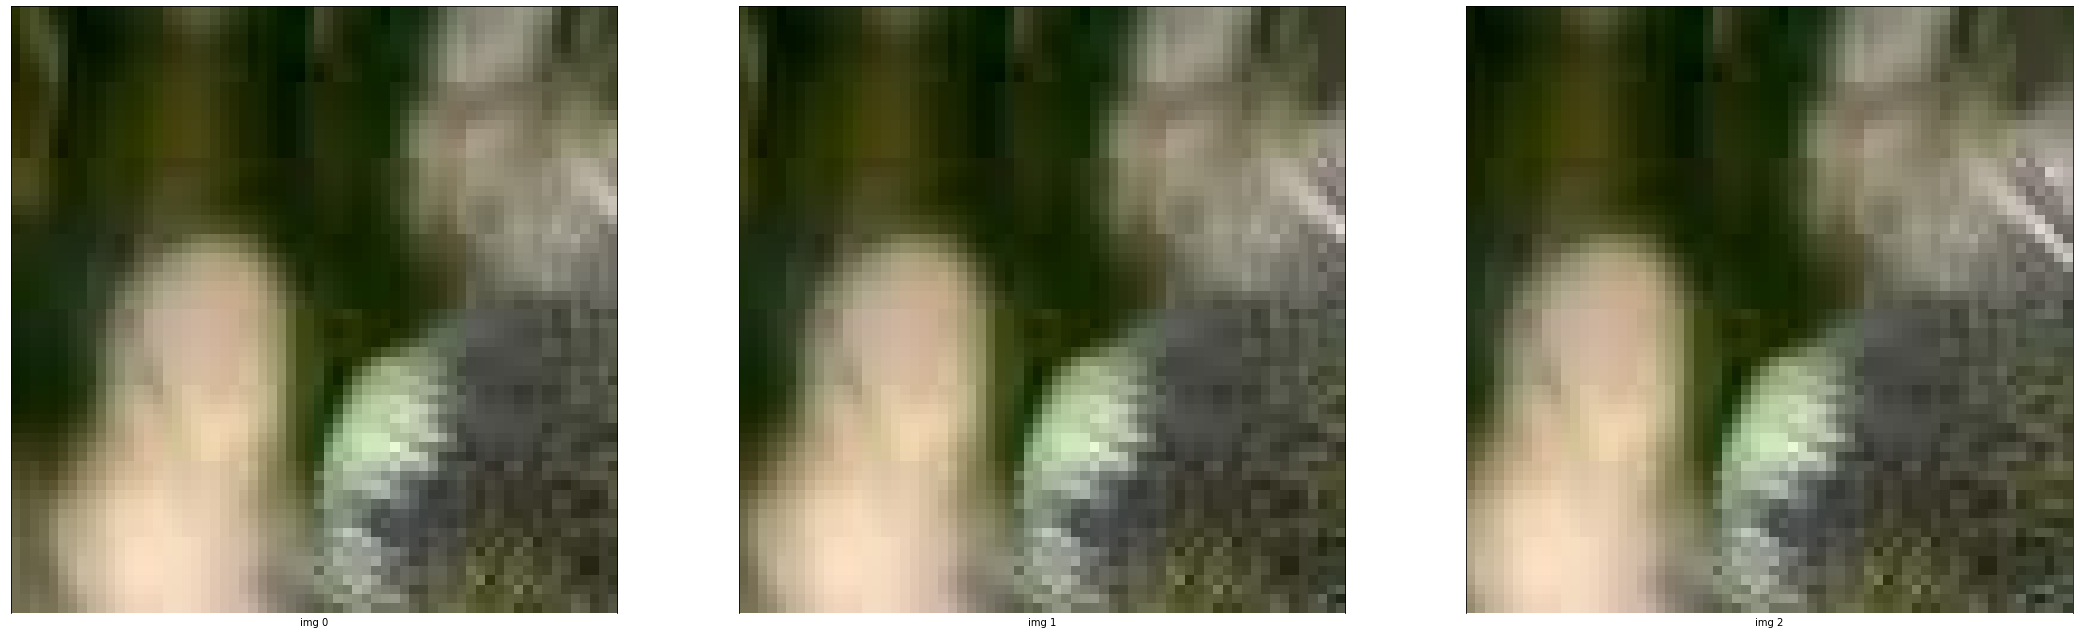

In [ ]:
height = 64
width = 64

img_data_RGB = imgToBlocksRGB([img_data_original[0]], bl_height = height, bl_width = width, pad_v = 1, pad_h = 1)
print(img_data_RGB.shape)
afficher_img([img_data_RGB[0].reshape(height, width, 3), img_data_RGB[3].reshape(height, width, 3), img_data_RGB[6].reshape(height, width, 3)],['img 0', 'img 1', 'img 2'])

In [ ]:
x_train, x_test = getTestTrain(img_data_RGB, 0.2)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), height, width, 3))
x_test = np.reshape(x_test, (len(x_test), height, width, 3))

print(x_train.shape)
print(x_test.shape)

noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

(20557, 64, 64, 3)
(4923, 64, 64, 3)


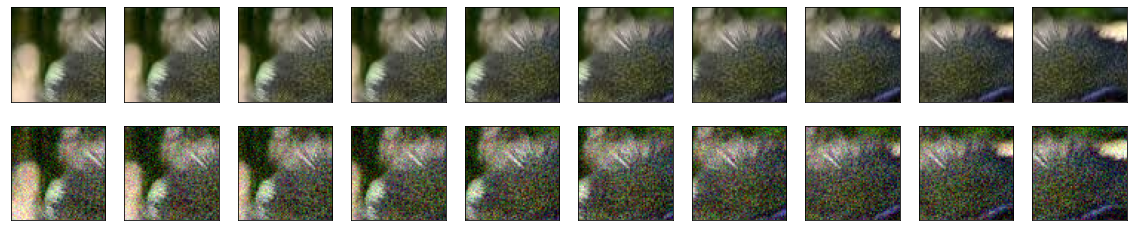

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i][:, :]) #.reshape(28, 28)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(x_test_noisy[i][:, :])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
input_img = keras.Input(shape=(height, width, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=16,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/7
161/161 [==============================] - 311s 2s/step - loss: 0.4635 - val_loss: 0.4597
Epoch 2/7
161/161 [==============================] - 316s 2s/step - loss: 0.4604 - val_loss: 0.4596
Epoch 3/7
161/161 [==============================] - 308s 2s/step - loss: 0.4603 - val_loss: 0.4596
Epoch 4/7
161/161 [==============================] - 355s 2s/step - loss: 0.4602 - val_loss: 0.4595
Epoch 5/7
161/161 [==============================] - 326s 2s/step - loss: 0.4602 - val_loss: 0.4594
Epoch 6/7
161/161 [==============================] - 325s 2s/step - loss: 0.4601 - val_loss: 0.4594
Epoch 7/7
161/161 [==============================] - 321s 2s/step - loss: 0.4600 - val_loss: 0.4593


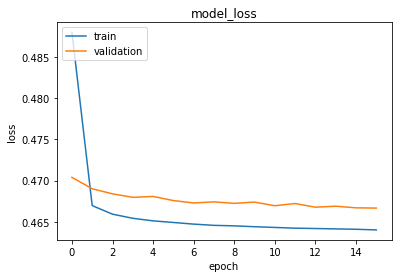

In [ ]:
autoencoder.metrics_names

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

154/154 [==============================] - 19s 120ms/step


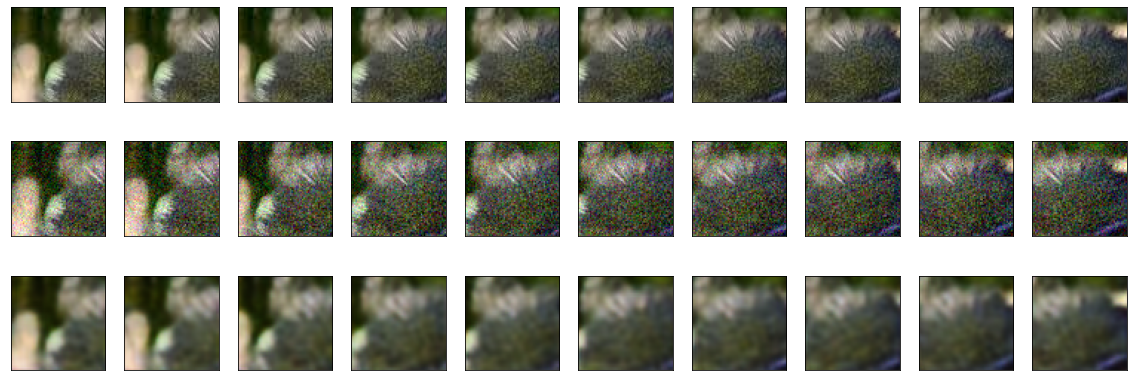

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 7))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(height, width, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noised
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(height, width, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(height, width, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# https://www.tensorflow.org/guide/keras/save_and_serialize
#autoencoder.save('../Code/Models/ImageBigBlockRgbCnnAutoencoder')
#autoencoder = model = keras.models.load_model('../Code/Models/ImageBigBlockRgbCnnAutoencoder')

## Application sur une image

In [ ]:
def blocksToImg(blocks, height, width, pad_v = 1, pad_h = 1):
  image_ctr = np.zeros((height, width, 4), dtype='float32')
  i = 0
  j = 0
  c = 0
  for b in blocks:
    image_ctr[i:i+b.shape[0], j:j+b.shape[1], c] += np.copy(b)
    c += 1
    if c == 3:
      image_ctr[i:i+b.shape[0], j:j+b.shape[1], 3] += 1
      c = 0
      j += pad_h
      if j + b.shape[1] >= width:
        j = 0
        i += pad_v
        if i + b.shape[0] >= height:
          break
  image_ctr[image_ctr[:, :, 3] == 0] = [0, 0, 0, 1]
  image = image_ctr[:, :, :3].astype('float32') / np.repeat(image_ctr[:, :, 3], 3).reshape(height, width, 3)
  image = np.clip(image.astype(int), 0, 255)
  return image

def blocksToImgRGB(blocks, height, width, pad_v = 1, pad_h = 1):
  image_ctr = np.zeros((height, width, 4), dtype='float32')
  i = 0
  j = 0
  for b in blocks:
    image_ctr[i:i+b.shape[0], j:j+b.shape[1], :3] += np.copy(b)
    image_ctr[i:i+b.shape[0], j:j+b.shape[1], 3]  += 1
    j += pad_h
    if j + b.shape[1] >= width:
      j = 0
      i += pad_v
      if i + b.shape[0] >= height:
        break
  image_ctr[image_ctr[:, :, 3] == 0] = [0, 0, 0, 1]
  image = image_ctr[:, :, :3].astype('float32') / np.repeat(image_ctr[:, :, 3], 3).reshape(height, width, 3)
  image = np.clip(image.astype(int), 0, 255)
  return image

In [ ]:
a = np.arange(2*2*4).reshape(2,2,4)

print(a)
print("===")
print(a[a[:, :, 3] == 3])

In [ ]:
a = np.arange(2*2*4).reshape(2,2,4)
b = np.repeat(a[:, :, 3], 3).reshape(2, 2, 3)
print(a)
print("===")
print(a[:, :, :3])
print("===")
print(b)
print("===")
b = a[:, :, :3] / b
print(b)

In [ ]:
def denoise(image, autoencoder, bl_height = 16, bl_width = 16, pad_v = 1, pad_h = 1):
  image_blocks_base = imgToBlocks([image], bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)
  image_blocks_base = image_blocks_base.astype('float32') / 255.
  image_blocks_base = np.reshape(image_blocks_base, (len(image_blocks_base), bl_height, bl_width, 1))
  image_blocks_predict = autoencoder.predict(image_blocks_base, verbose=0)
  image_blocks_predict = (image_blocks_predict * 255)
  image_blocks_predict = np.reshape(image_blocks_predict, (-1, bl_height, bl_width)).astype(int)
  image_predict = blocksToImg(image_blocks_predict, image.shape[0], image.shape[1], pad_v = pad_v, pad_h = pad_h).astype(int)
  return image_predict

def denoiseRGB(image, autoencoder, bl_height = 16, bl_width = 16, pad_v = 1, pad_h = 1):
  image_blocks_base = imgToBlocksRGB([image], bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)
  image_blocks_base = image_blocks_base.astype('float32') / 255.
  image_blocks_base = np.reshape(image_blocks_base, (len(image_blocks_base), bl_height, bl_width, 3))
  image_blocks_predict = autoencoder.predict(image_blocks_base, verbose=0)
  image_blocks_predict = (image_blocks_predict * 255)
  image_blocks_predict = np.reshape(image_blocks_predict, (-1, bl_height, bl_width, 3)).astype(int)
  image_predict = blocksToImgRGB(image_blocks_predict, image.shape[0], image.shape[1], pad_v = pad_v, pad_h = pad_h).astype(int)
  return image_predict

In [ ]:
image = np.copy(img_data_original[0])

noise_factor = 0.0
image_noisy = image + noise_factor * np.random.normal(loc=0.0, scale=255.0, size=image.shape)

image_noisy = np.clip(image_noisy, 0., 255.).astype(int)

image_predict = denoiseRGB(image_noisy, autoencoder, bl_height = height, bl_width = width, pad_v = int(height/4), pad_h = int(height/4))
#image_predict = denoise(image_noisy, autoencoder, bl_height = height, bl_width = width, pad_v = int(height/4), pad_h = int(width/4))

86/86 [==============================] - 2s 19ms/step


In [ ]:
int(3*height/4)

12

In [ ]:
image_predict2 = denoiseRGB(image_predict, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
# image_predict2 = denoise(image_predict, doubleAutoencoder, pad_v = 1, pad_h = 1)
image_predict3 = denoiseRGB(image_predict2, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
image_predict4 = denoiseRGB(image_predict3, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
image_predict4 = denoiseRGB(image_predict4, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
image_predict4 = denoiseRGB(image_predict4, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
image_predict4 = denoiseRGB(image_predict4, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)
image_predict4 = denoiseRGB(image_predict4, autoencoder, bl_height = height, bl_width = width, pad_v = 4, pad_h = 4)

51/51 [==============================] - 6s 117ms/step


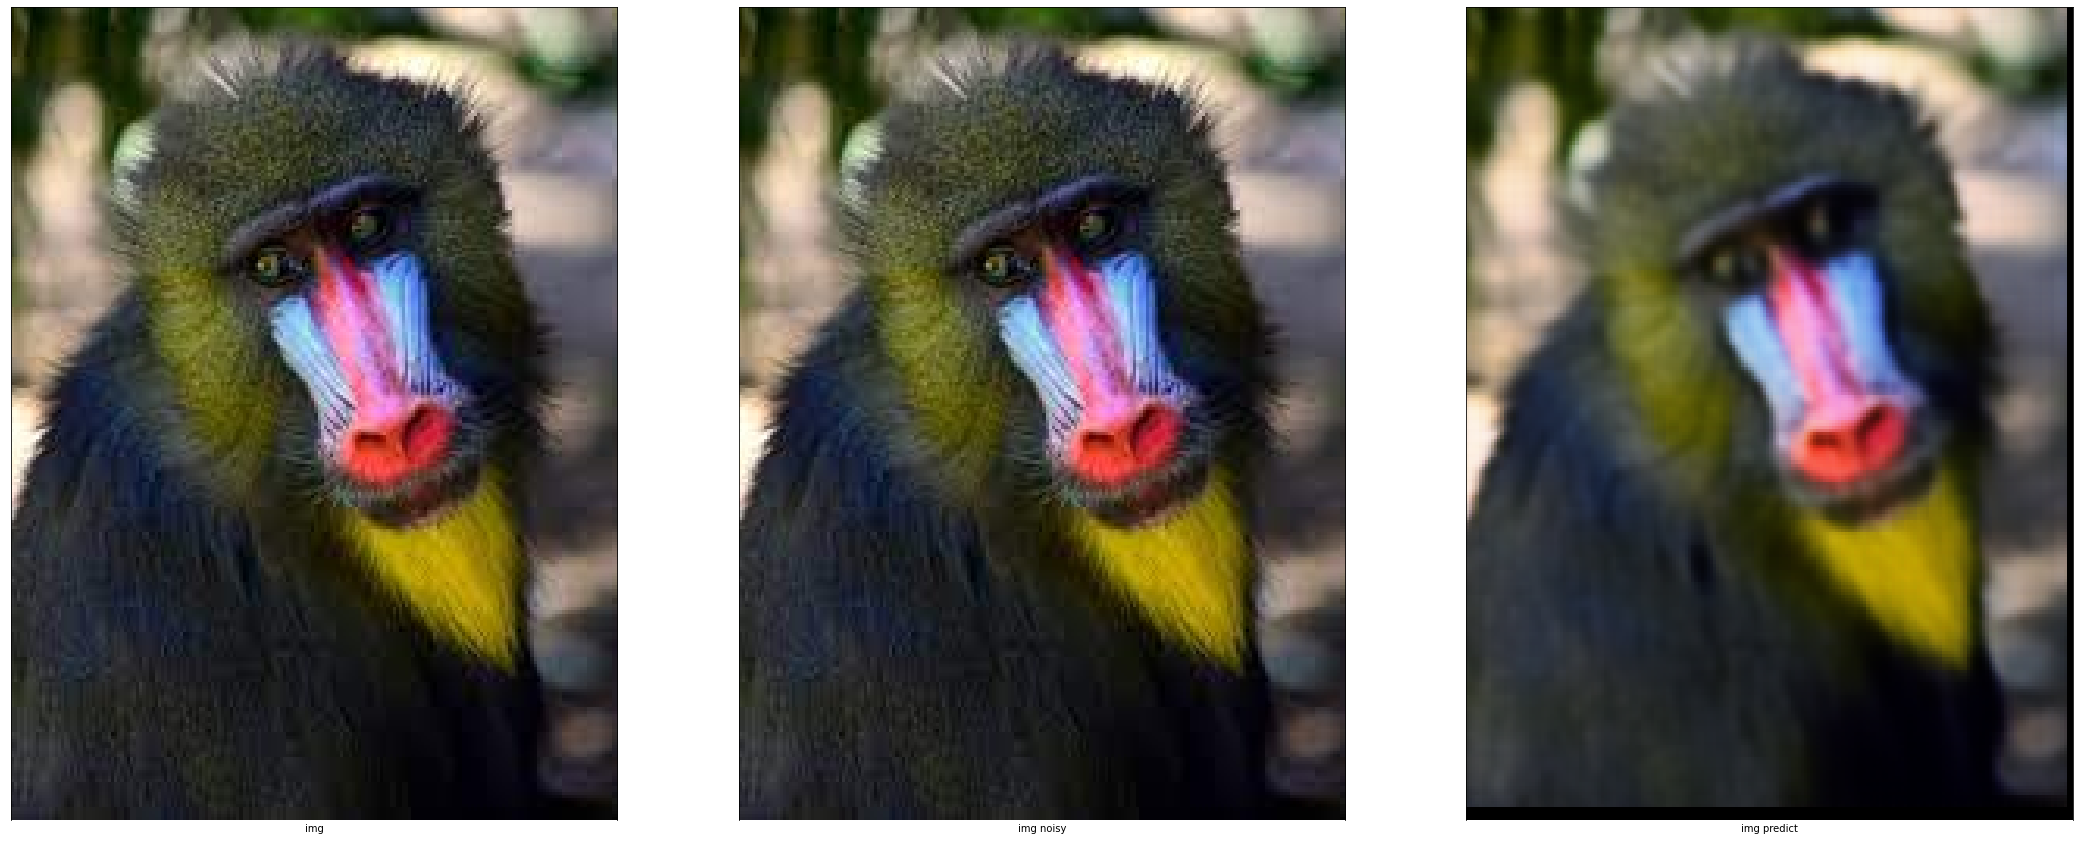

In [ ]:
afficher_img([image, image_noisy, image_predict],['img', 'img noisy', 'img predict'])

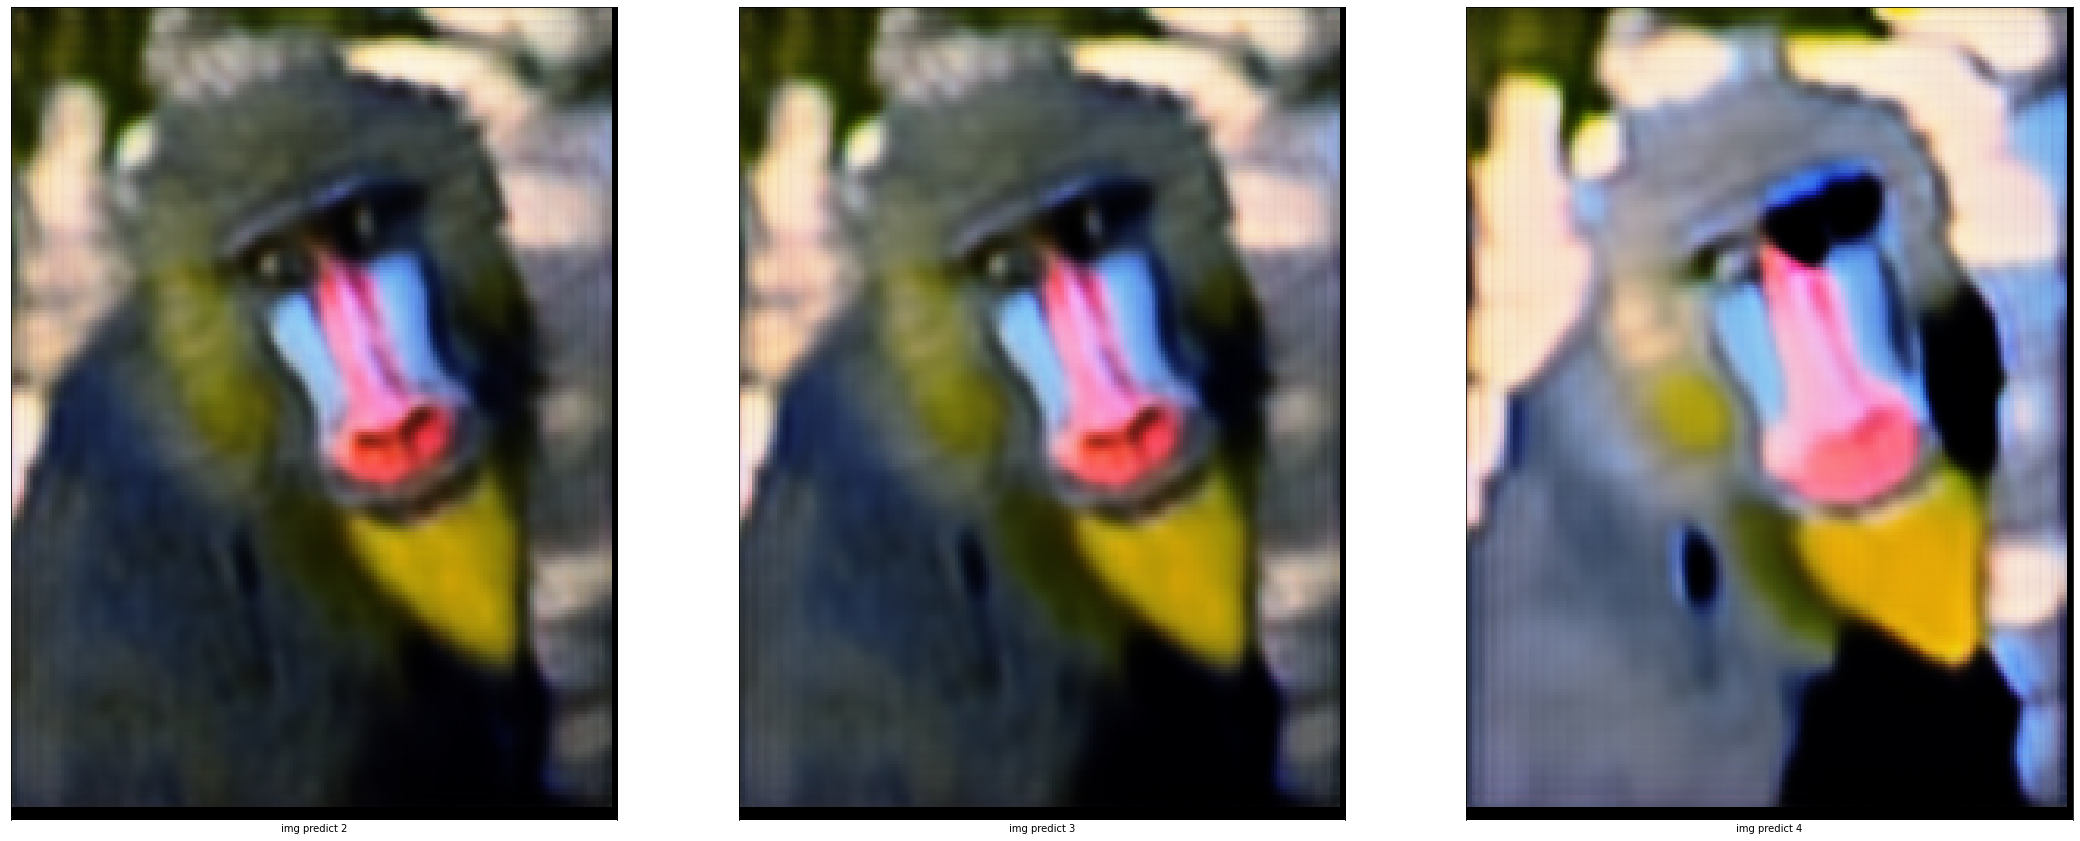

In [ ]:
afficher_img([image_predict2, image_predict3, image_predict4],['img predict 2', 'img predict 3', 'img predict 4'])

In [ ]:
afficher_img([image_predict],['img predict'])

In [ ]:
a = np.arange(2 * 3 * 3).reshape(2, 3, 3)

print(a)

## Evaluation

In [ ]:
MAX_VALUE_PSNR = 20 * math.log(255, 10)
def PSNR(imgA, imgB):
  #10 * log10(MAX**2 / MSE) == 20 * log10(MAX) - 10*log10(MSE)
  # MAX = 255
  # MSE = 1/N * Sum(i=1..n, (pA - pB)**2)
  MSE = np.average((imgA - imgB)**2)
  if (MSE == 0):
    return math.inf
  else:
    return MAX_VALUE_PSNR - 10 * math.log(MSE, 10)

In [ ]:
imgA = np.arange(2*2*3).reshape(2, 2, 3)
imgB = (np.arange(2*2*3)+1.0).reshape(2, 2, 3)
print(PSNR(imgA, imgB))

48.13080360867909


In [ ]:
print(PSNR(image, image_predict))

26.032968679747146


In [ ]:
def evaluateNoiseSigmaRGB(image, autoencoder, low, high, step, bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4):
  history = []

  for sigma in np.arange(low, high, step):
    image_noisy = image + sigma * np.random.normal(loc=0.0, scale=255.0, size=image.shape)
    image_noisy = np.clip(image_noisy, 0., 255.).astype(int)

    image_predict = denoiseRGB(image_noisy, autoencoder, bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)

    history += [PSNR(image, image_predict)]

  return history

def evaluateNoiseSigma(image, autoencoder, low, high, step, bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4):
  history = []

  for sigma in np.arange(low, high, step):
    image_noisy = image + sigma * np.random.normal(loc=0.0, scale=255.0, size=image.shape)
    image_noisy = np.clip(image_noisy, 0., 255.).astype(int)

    image_predict = denoise(image_noisy, autoencoder, bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)

    history += [PSNR(image, image_predict)]

  return history

In [ ]:
print(np.arange(0, 5, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]


In [ ]:
history = []

for img in img_data_original:
  history += [evaluateNoiseSigma(img, autoencoder, 0.0, 0.6, 0.1)]

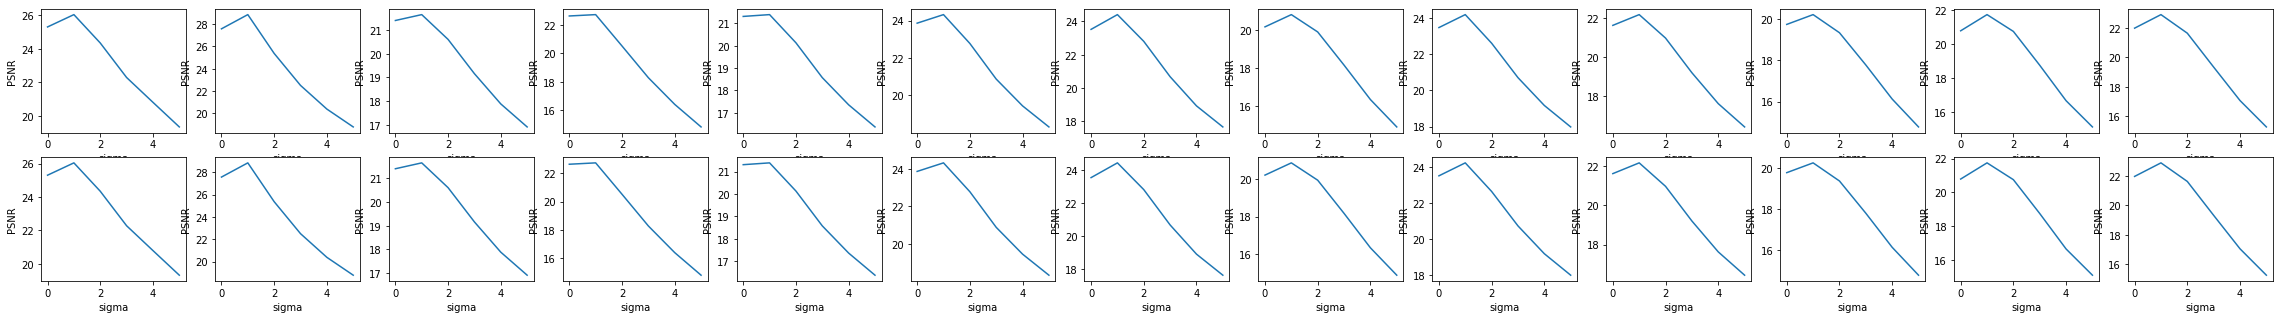

In [ ]:
n = int(len(history)/2)
plt.figure(figsize=(40, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.plot(history[i])
    #plt.title('PSNR over sigma')
    plt.ylabel('PSNR')
    plt.xlabel('sigma')

    ax = plt.subplot(2, n, i+1 + n)
    plt.plot(history[i])
    #plt.title('PSNR over sigma')
    plt.ylabel('PSNR')
    plt.xlabel('sigma')
plt.show()

In [ ]:
historyAvg = []
h = np.array(history)
for i in range(len(h[0])):
  historyAvg += [np.average(h[:, i])]

In [ ]:
plt.plot(historyAvg)
plt.title('PSNR over sigma')
plt.ylabel('PSNR')
plt.xlabel('sigma')
plt.show()

In [ ]:
historyAll = []
h = np.array(history)
for i in range(len(h[0])):
  historyAll += [h[:, i]]

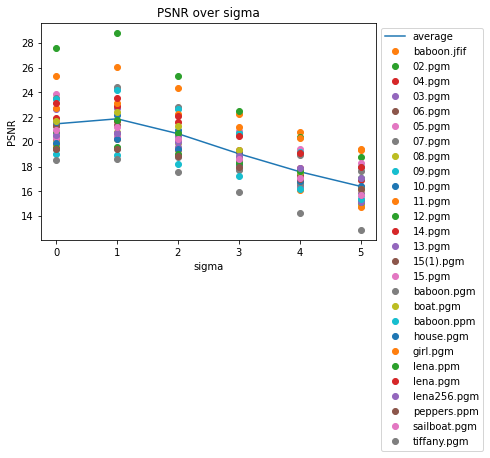

In [ ]:
plt.plot(historyAvg)
plt.plot(historyAll, 'o')
plt.title('PSNR over sigma')
plt.ylabel('PSNR')
plt.xlabel('sigma')
plt.legend(['average']+img_names_original, bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
def evaluateRGB(images, autoencoder, low, high, step, bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4):
  history = []

  for img in images:
    history += [evaluateNoiseSigmaRGB(img, autoencoder, low, high, step, bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)]
  
  historyAvg = []
  h = np.array(history)
  for i in range(len(h[0])):
    historyAvg += [np.average(h[:, i])]
  
  historyAll = []
  h = np.array(history)
  for i in range(len(h[0])):
    historyAll += [h[:, i]]

  plt.plot(historyAvg)
  plt.plot(historyAll, 'o')
  plt.title('PSNR over sigma')
  plt.ylabel('PSNR')
  plt.xlabel('sigma')
  plt.legend(['average']+img_names_original, bbox_to_anchor=(1,1), loc="upper left")
  plt.show()

  return historyAvg, historyAll

def evaluate(images, autoencoder, low, high, step, bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4):
  history = []

  for img in images:
    history += [evaluateNoiseSigma(img, autoencoder, low, high, step, bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)]
  
  historyAvg = []
  h = np.array(history)
  for i in range(len(h[0])):
    historyAvg += [np.average(h[:, i])]
  
  historyAll = []
  h = np.array(history)
  for i in range(len(h[0])):
    historyAll += [h[:, i]]

  plt.plot(historyAvg)
  plt.plot(historyAll, 'o')
  plt.title('PSNR over sigma')
  plt.ylabel('PSNR')
  plt.xlabel('sigma')
  plt.legend(['average']+img_names_original, bbox_to_anchor=(1,1), loc="upper left")
  plt.show()

  return historyAvg, historyAll

In [ ]:
def afficher_image_from_name(name, bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4):
  image = np.array(img_data_original)[np.array(img_names_original) == name][0]

  noise_factor = 0.1
  image_noisy = image + noise_factor * np.random.normal(loc=0.0, scale=255.0, size=image.shape)

  image_noisy = np.clip(image_noisy, 0., 255.).astype(int)

  image_predict = denoise(image_noisy, autoencoder, bl_height = bl_height, bl_width = bl_width, pad_v = pad_v, pad_h = pad_h)

  afficher_img([image, image_noisy, image_predict], [name, name+"(noised)", name+"(denoised)"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


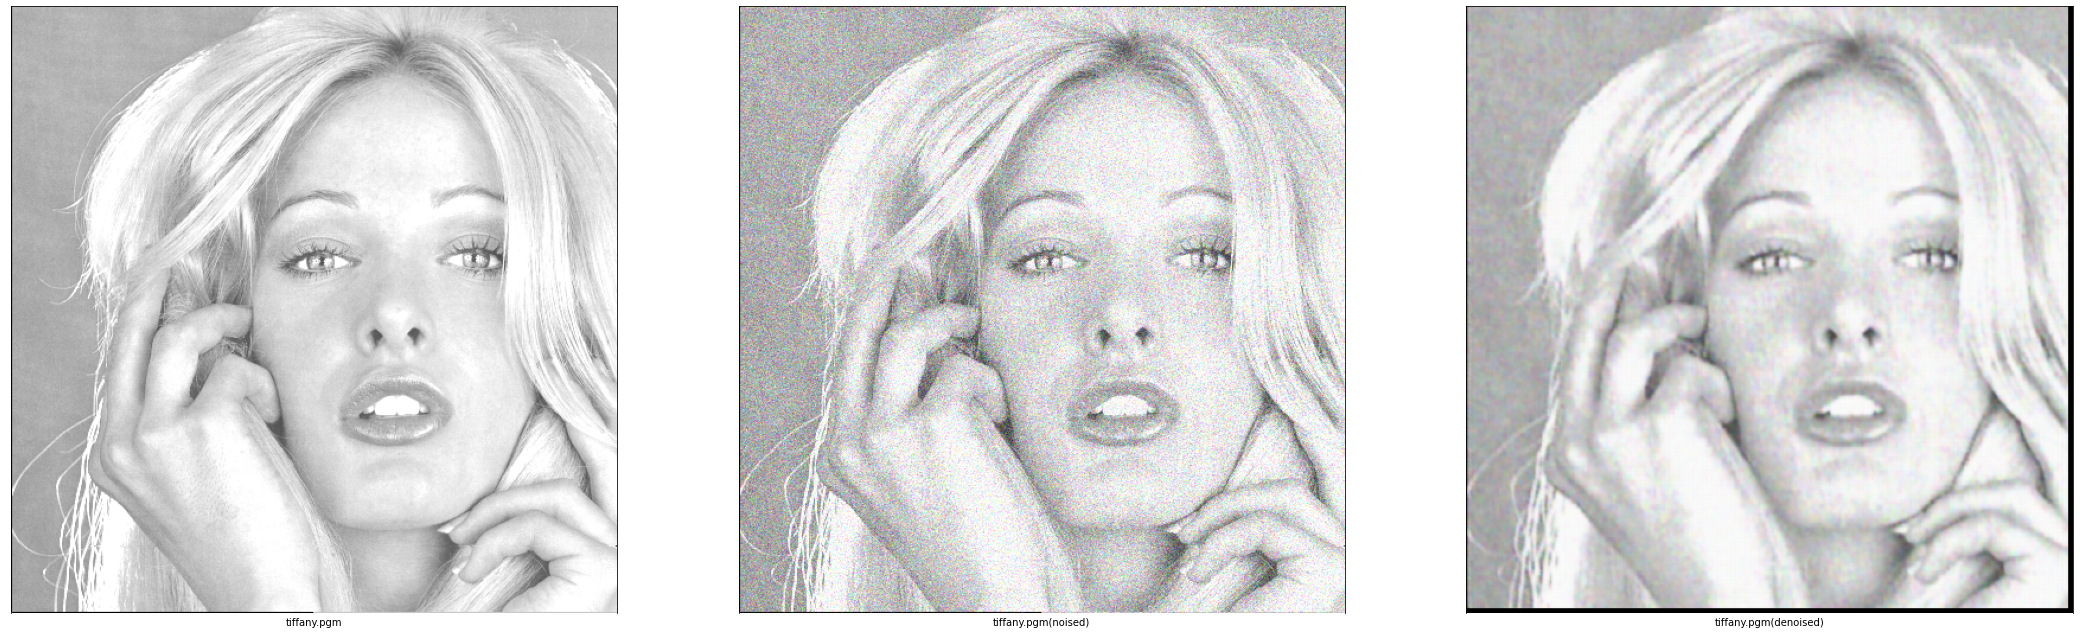

In [ ]:
autoencoder = keras.models.load_model('../Code/Models/ImageBlockCNNAutoencoder')

afficher_image_from_name("tiffany.pgm", bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


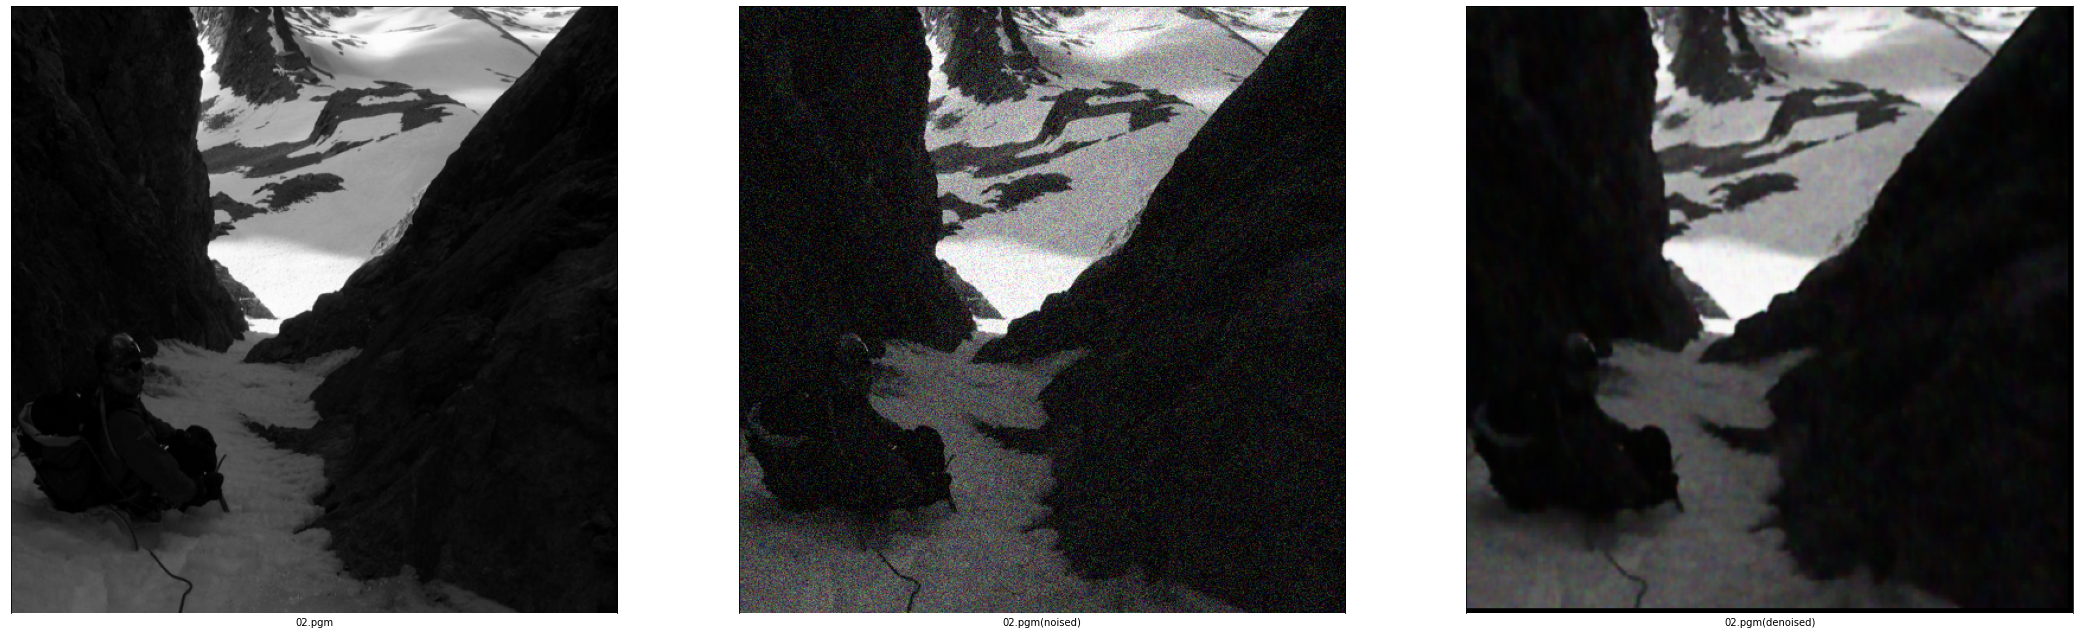

In [ ]:
afficher_image_from_name("02.pgm", bl_height = 16, bl_width = 16, pad_v = 4, pad_h = 4)

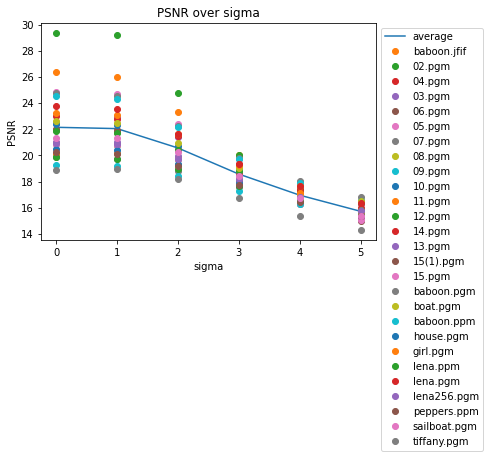

In [ ]:
autoencoder = keras.models.load_model('../Code/Models/ImageBlockCNNAutoencoder')
historyAvg, historyAll = evaluate(img_data_original, autoencoder, 0.0, 0.6, 0.1)

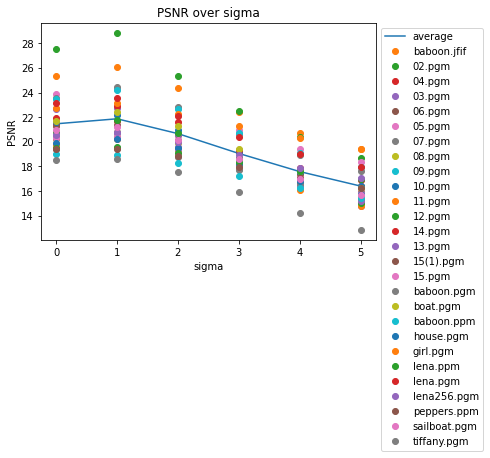

In [ ]:
autoencoder = keras.models.load_model('../Code/Models/ImageBlockRgbCnnAutoencoder')
historyAvgRgb, historyAllRgb = evaluateRGB(img_data_original, autoencoder, 0.0, 0.6, 0.1)

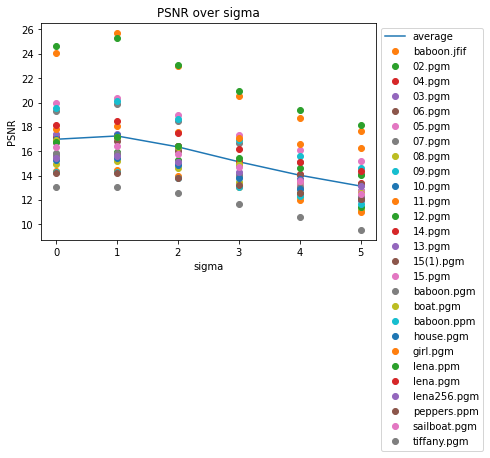

In [ ]:
autoencoder = keras.models.load_model('../Code/Models/ImageBigBlockRgbCnnAutoencoder')
historyAvgBigRgb, historyAllBigRgb = evaluateRGB(img_data_original, autoencoder, 0.0, 0.6, 0.1, bl_height = 64, bl_width = 64, pad_v = 16, pad_h = 16)

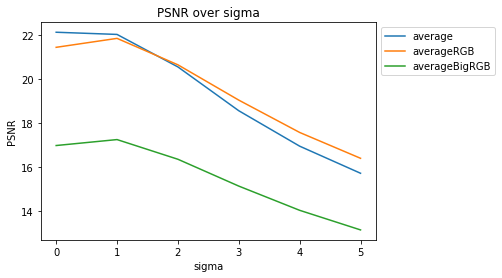

In [ ]:
historyAvgAll = []
for i in range(len(historyAvg)):
  historyAvgAll += [[historyAvg[i], historyAvgRgb[i], historyAvgBigRgb[i]]]
plt.plot(historyAvgAll)
plt.title('PSNR over sigma')
plt.ylabel('PSNR')
plt.xlabel('sigma')
plt.legend(['average', 'averageRGB', 'averageBigRGB'], bbox_to_anchor=(1,1), loc="upper left")
plt.show()